### Correlazione tra timeseries giornaliere 

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
import datetime
import geopandas as gpd
import folium
import time
import my_code
warnings.filterwarnings('ignore')

import seaborn as sns

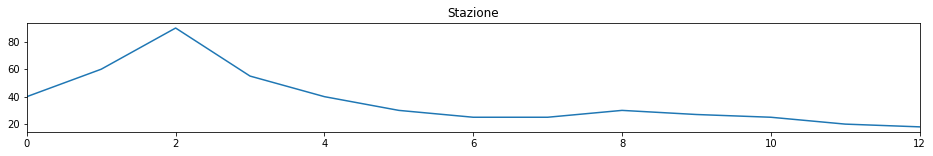

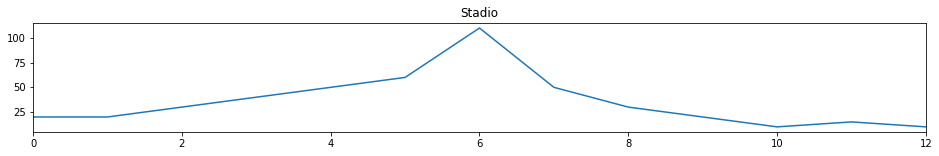

In [10]:
stz = pd.Series([40,  60, 90, 55, 40, 30, 25, 25, 30, 27,  25, 20, 18], 
       index =['0','1','2','3','4','5','6','7','8','9','10','11','12'])

stadio = pd.Series([20,  20, 30, 40, 50, 60, 110, 50, 30, 20, 10, 15, 10], 
       index =['0','1','2','3','4','5','6','7','8','9','10','11','12'])


plt.figure(figsize = (16, 2))
plt.title('Stazione')
stz.plot() 
plt.show()

plt.figure(figsize = (16, 2)) 
plt.title('Stadio')
stadio.plot() 
plt.show()

In [11]:
def crosscorr(x, y, lag):
        return x.corr(y.shift(lag))

In [12]:
for i in range(len(stadio)-1):
    cc = crosscorr(stadio, stz, i)
    print('Lag =',i ,'--> ', cc)

Lag = 0 -->  -0.07119897962703836
Lag = 1 -->  0.12258047159792085
Lag = 2 -->  0.3754739718453517
Lag = 3 -->  0.6548462965748838
Lag = 4 -->  0.9744262598482712
Lag = 5 -->  0.5554061146167605
Lag = 6 -->  0.08385949581333106
Lag = 7 -->  -0.022752750642007973
Lag = 8 -->  -0.46656947481584343
Lag = 9 -->  -0.228325866738311
Lag = 10 -->  -0.11470786693528087
Lag = 11 -->  -0.9999999999999999


In [13]:
data = pd.read_csv('/Users/alket/desktop/dati/new_data_backfill_forwfill.csv',index_col = 0)
agg_by_cell_day = data.groupby(by = ['date','cell_num'])
agg_by_cell = data.groupby(by = ['cell_num'])

In [14]:
cell_x = agg_by_cell_day.get_group(('2017-04-16', '486-1252'))
cell_x

date  cell_num  nr_people  hours  minutes
0      2017-04-16  486-1252       36.0    0.0      0.0
221    2017-04-16  486-1252       36.0    0.0     15.0
442    2017-04-16  486-1252       34.0    0.0     30.0
663    2017-04-16  486-1252       33.0    0.0     45.0
884    2017-04-16  486-1252       32.0    1.0      0.0
...           ...       ...        ...    ...      ...
20111  2017-04-16  486-1252       35.0   22.0     45.0
20332  2017-04-16  486-1252       33.0   23.0      0.0
20553  2017-04-16  486-1252       32.0   23.0     15.0
20774  2017-04-16  486-1252       32.0   23.0     30.0
20995  2017-04-16  486-1252       32.0   23.0     45.0

[96 rows x 5 columns]

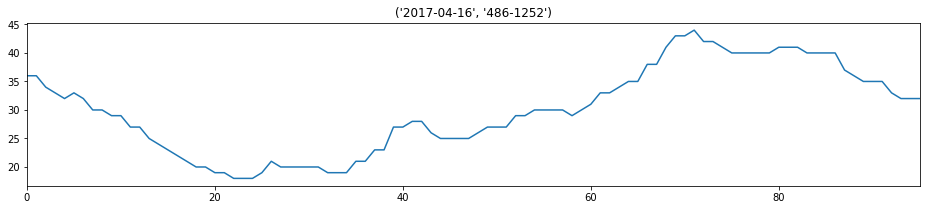

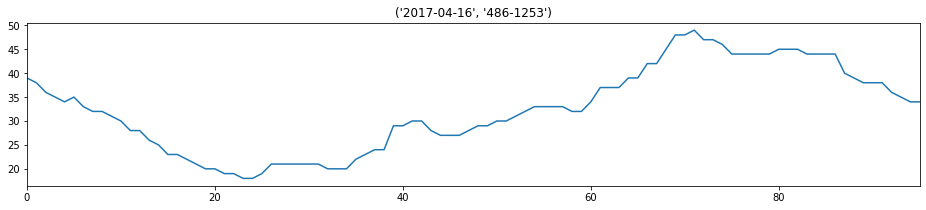

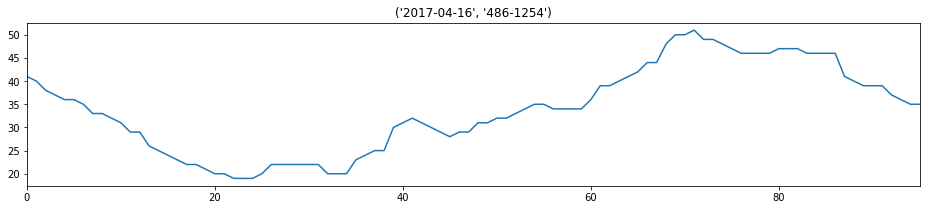

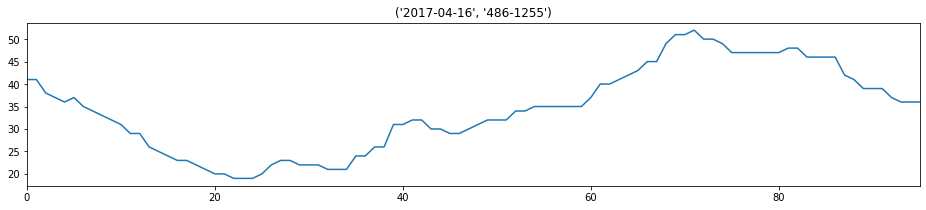

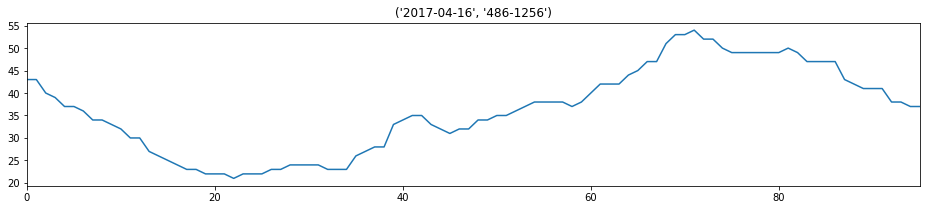

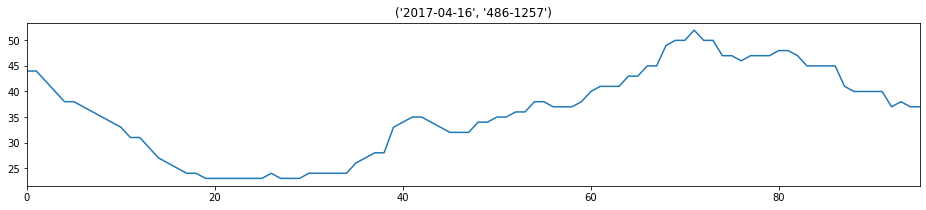

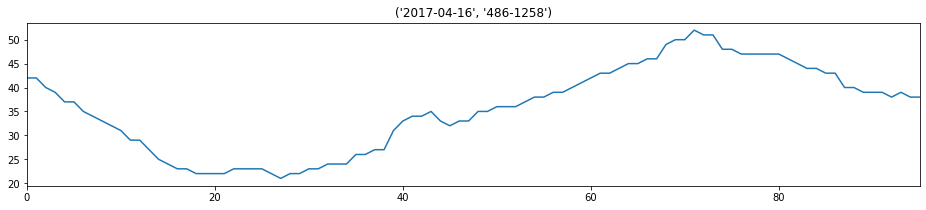

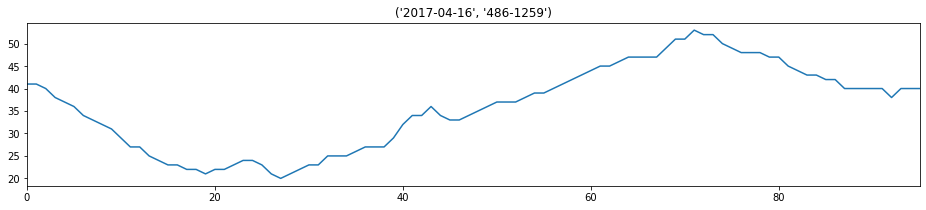

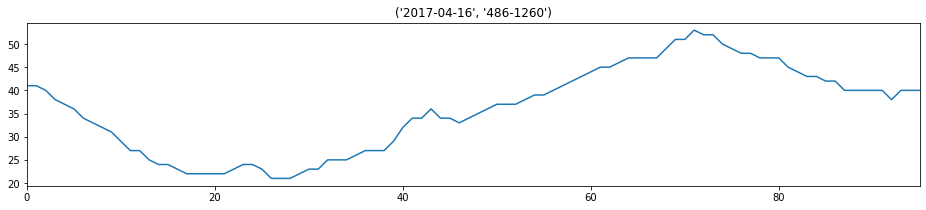

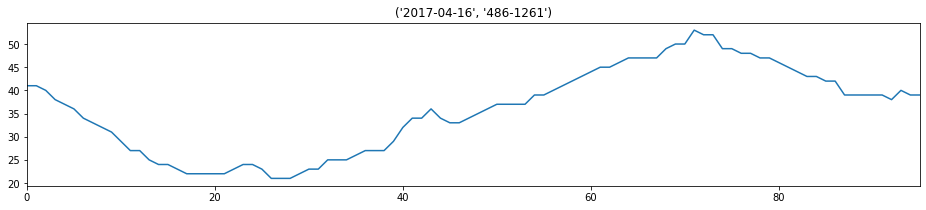

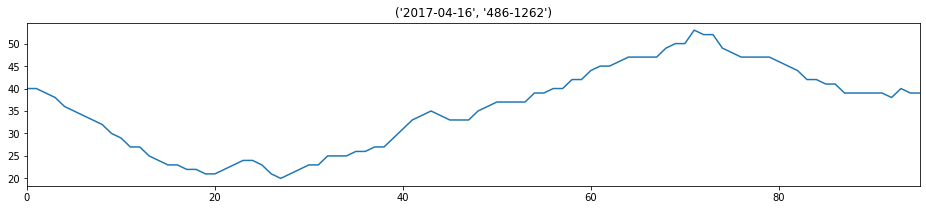

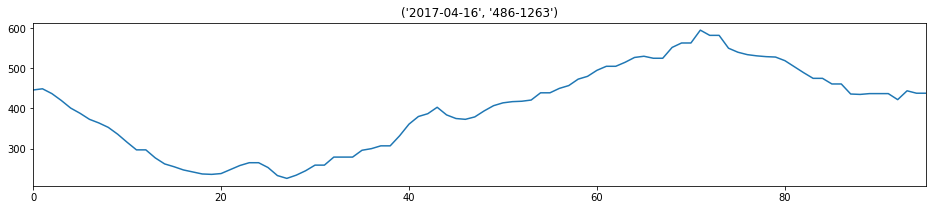

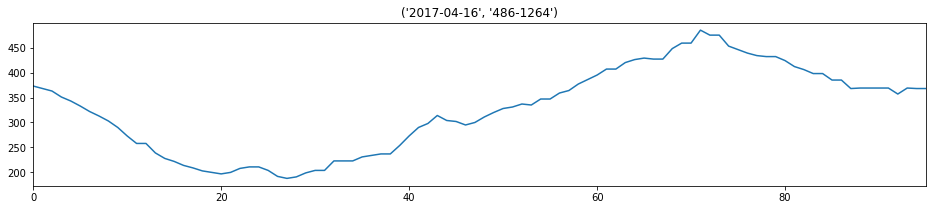

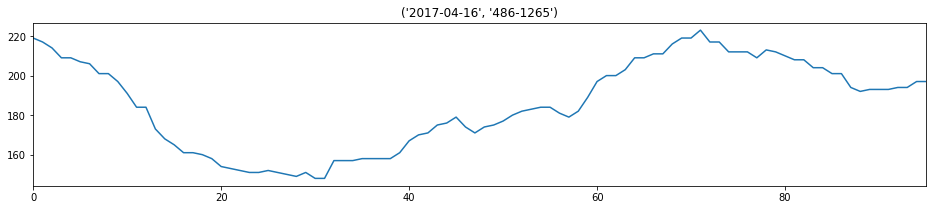

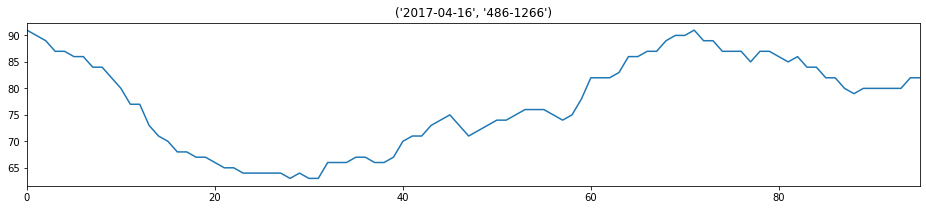

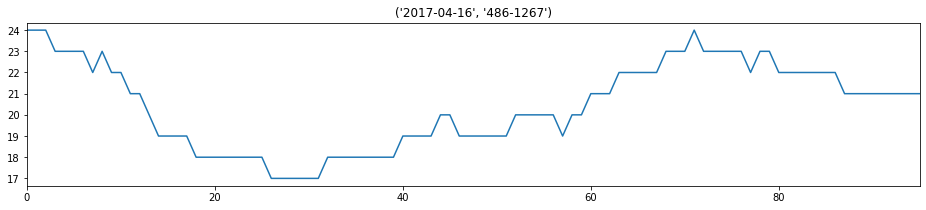

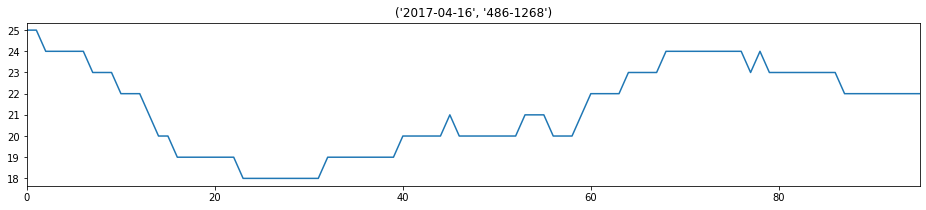

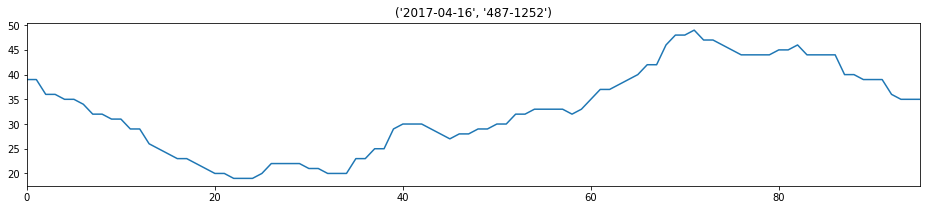

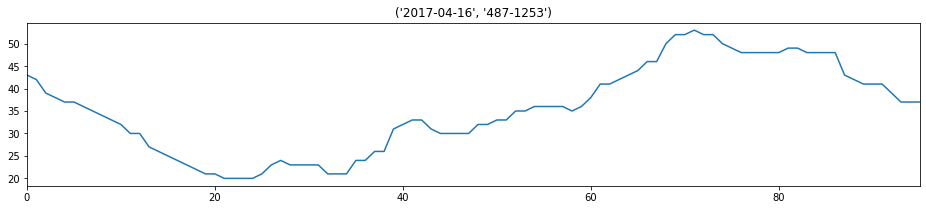

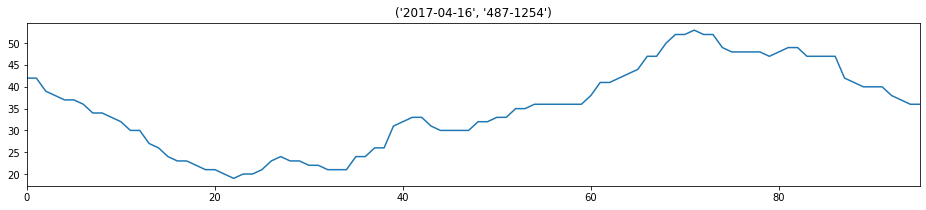

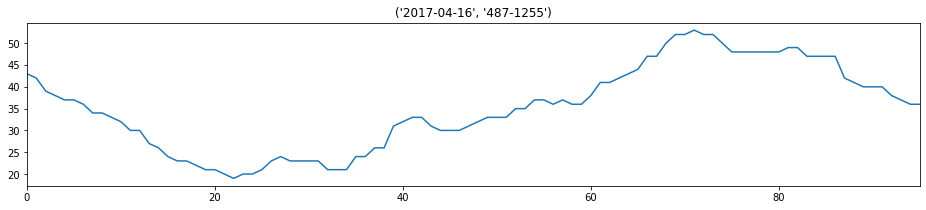

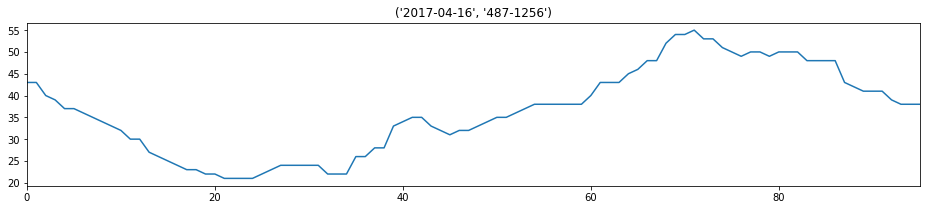

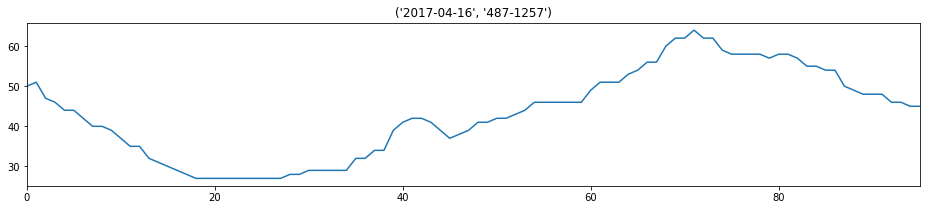

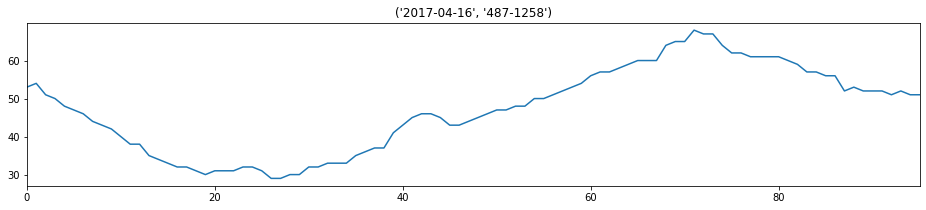

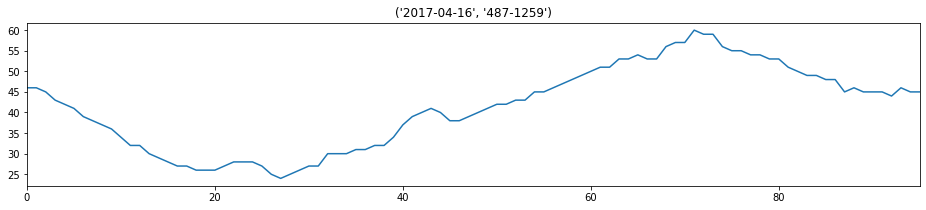

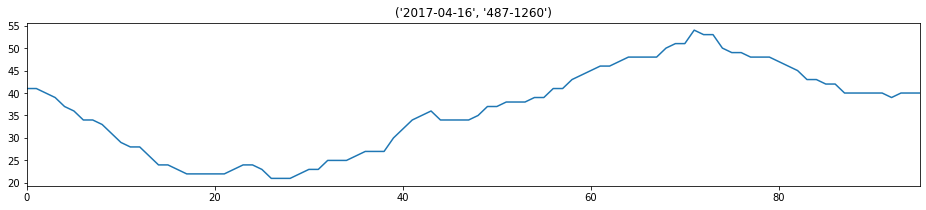

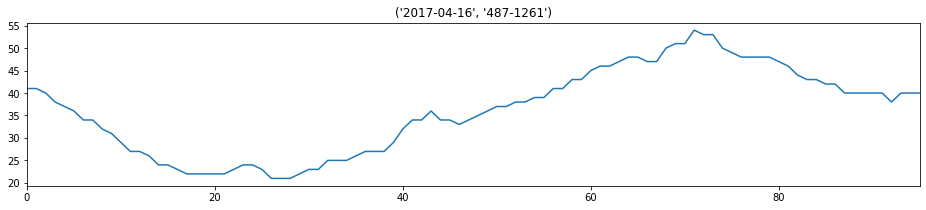

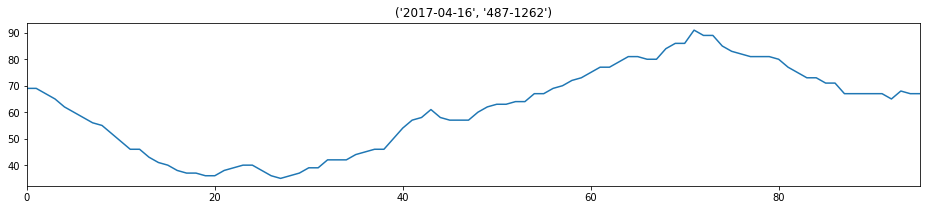

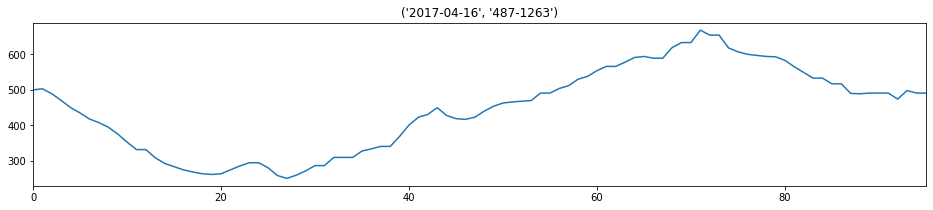

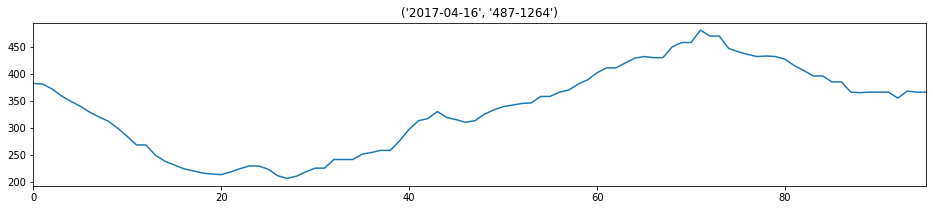

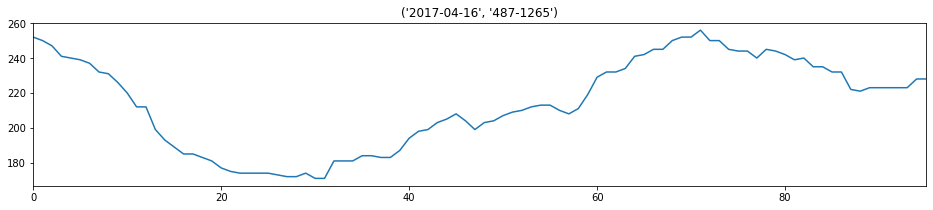

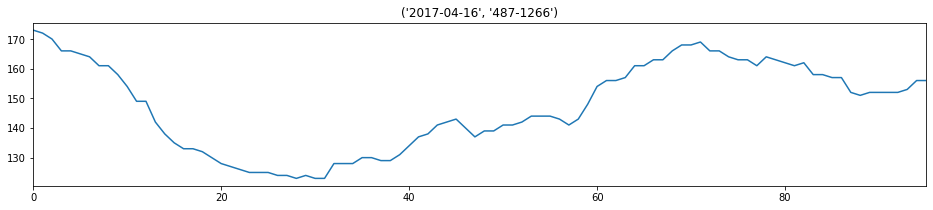

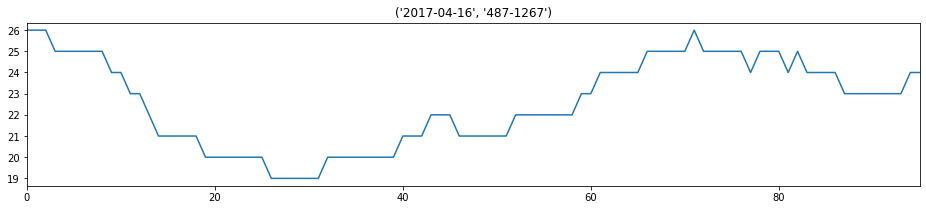

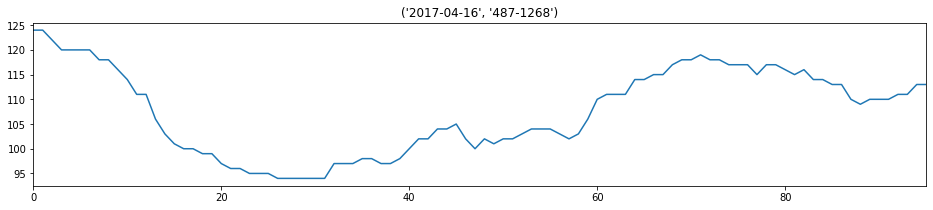

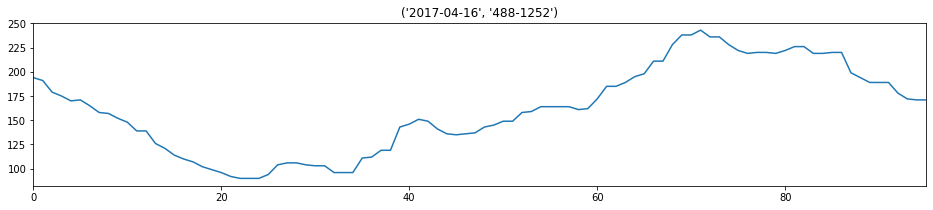

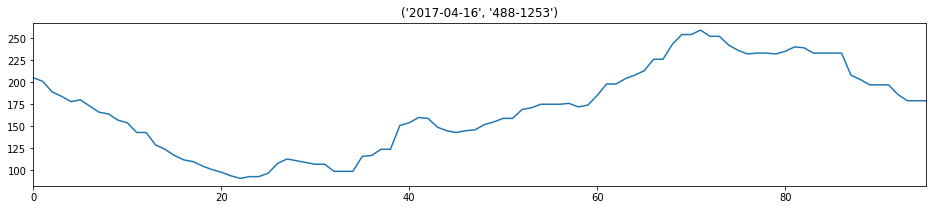

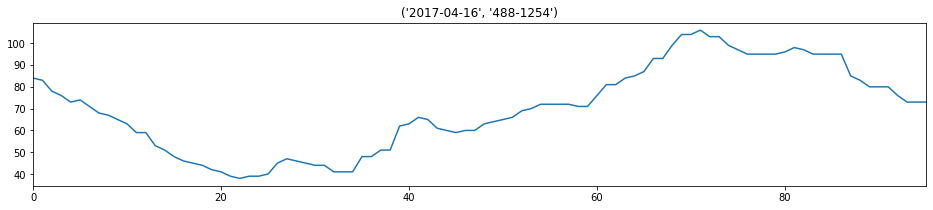

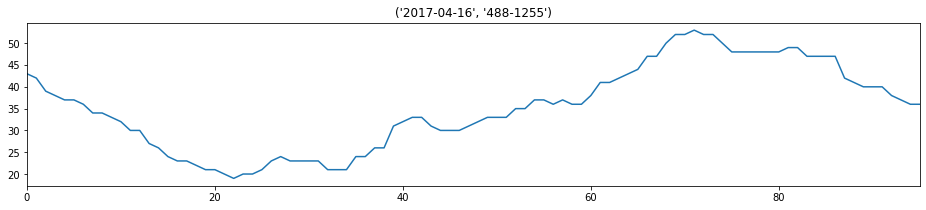

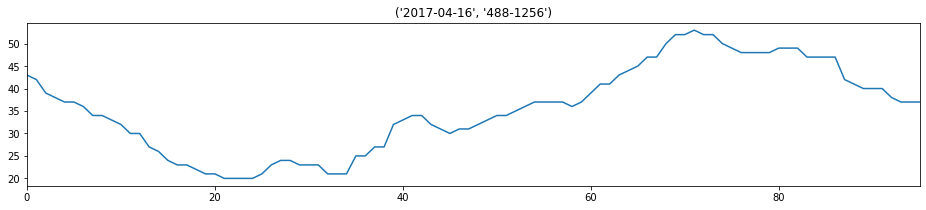

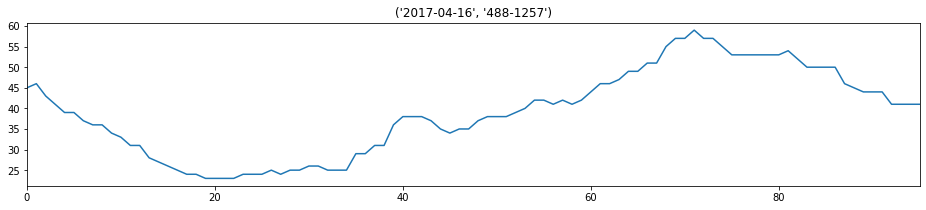

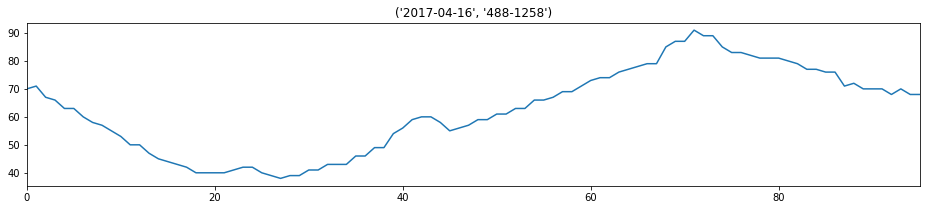

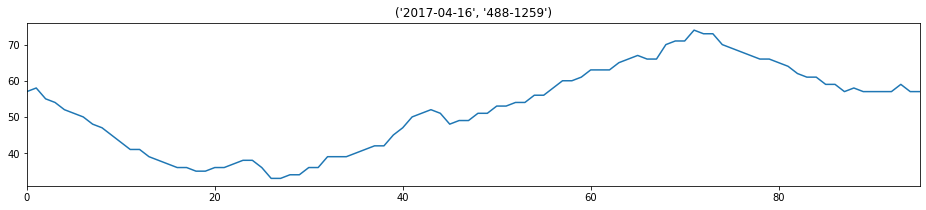

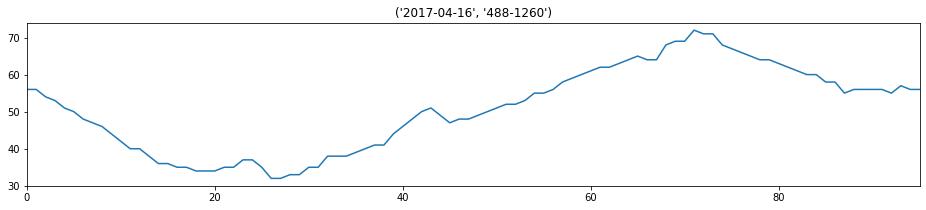

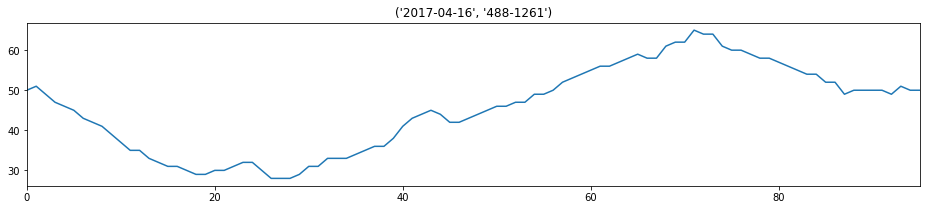

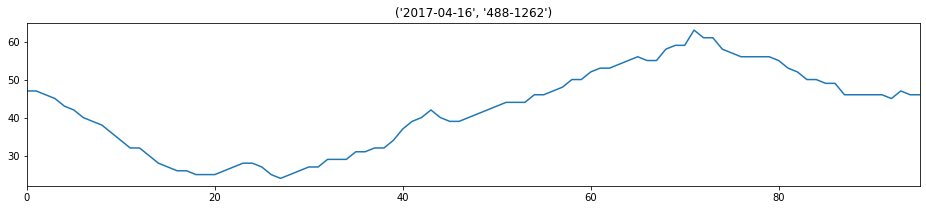

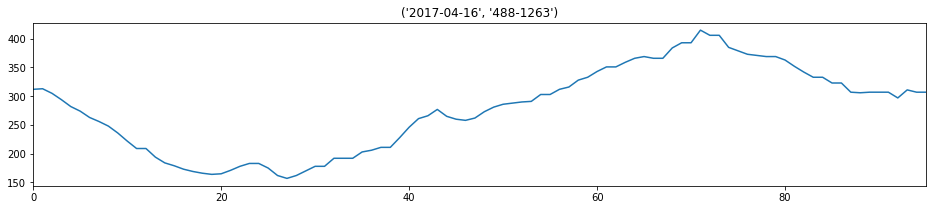

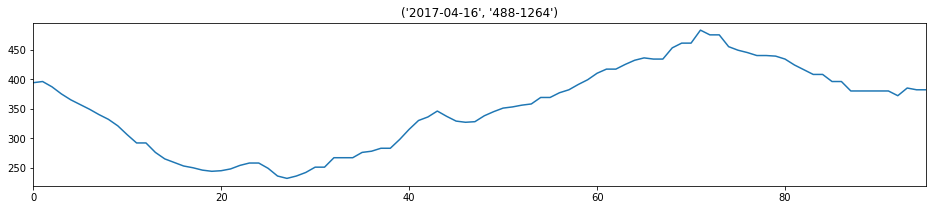

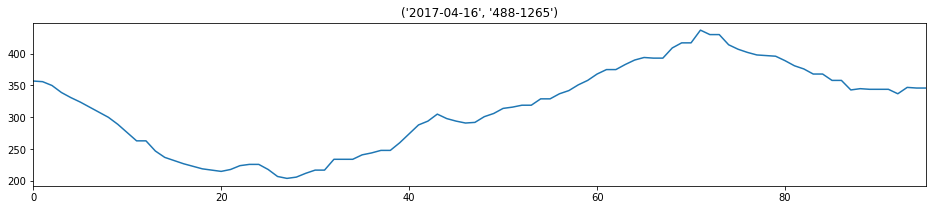

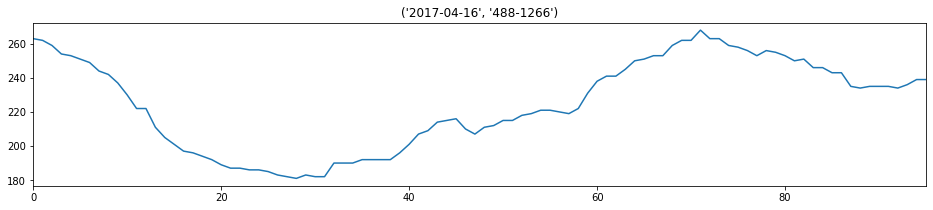

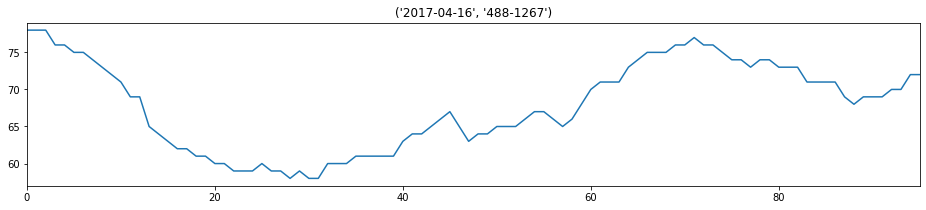

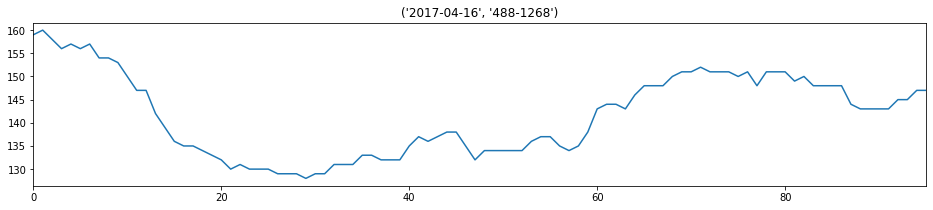

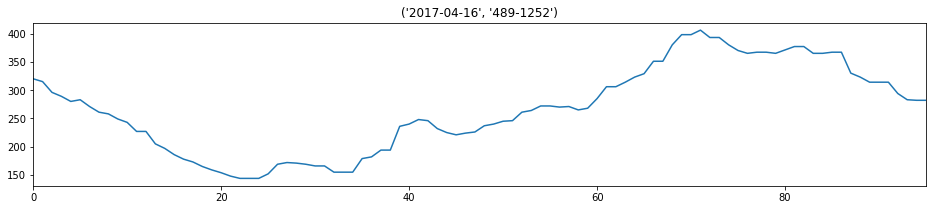

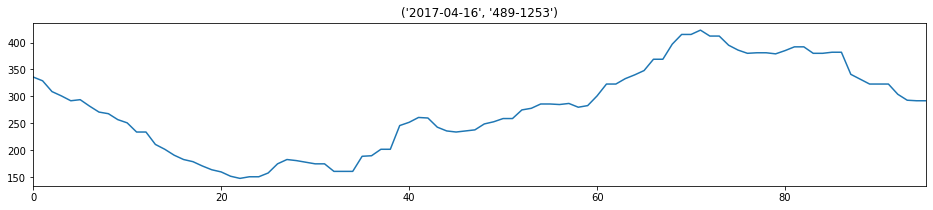

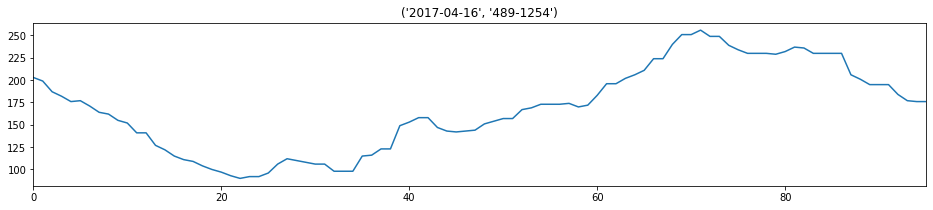

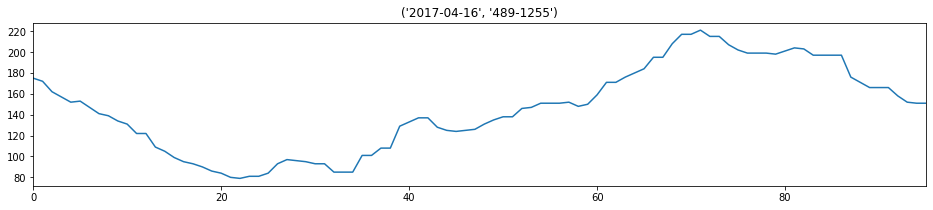

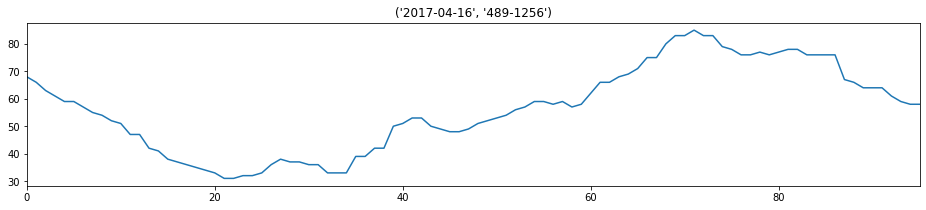

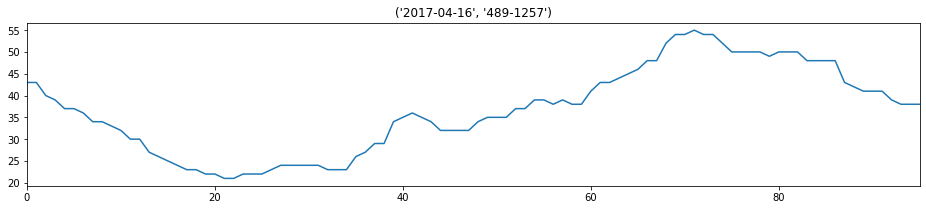

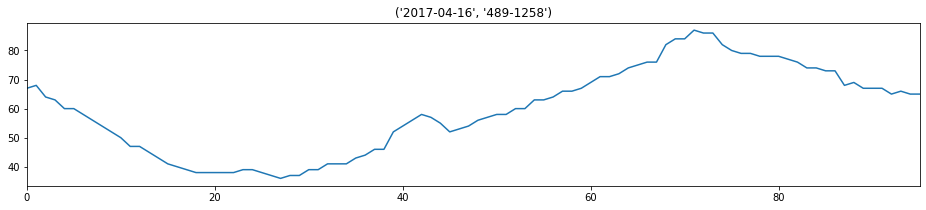

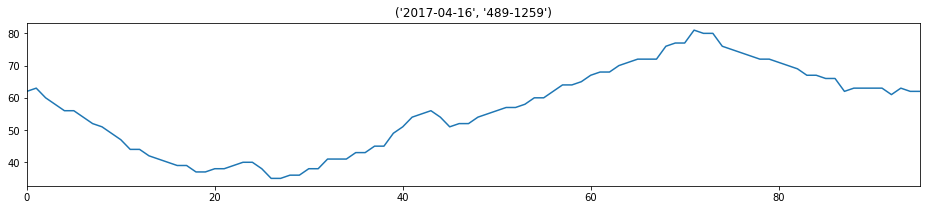

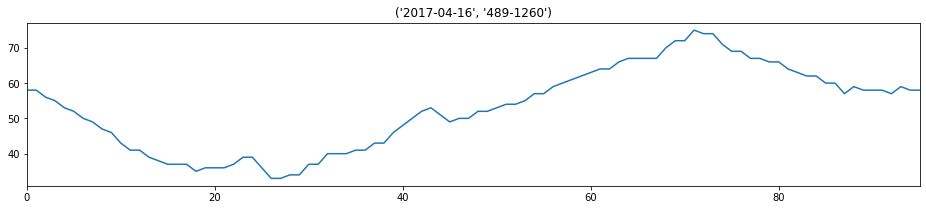

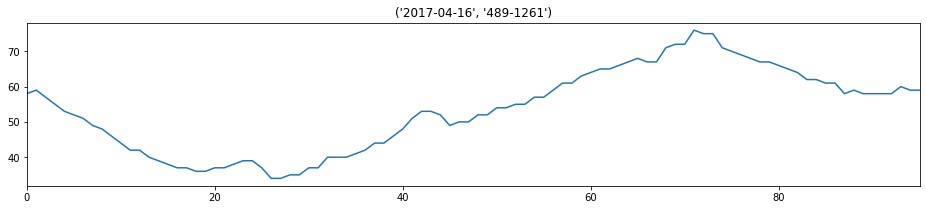

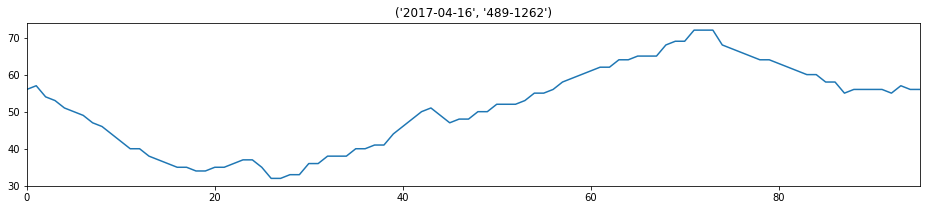

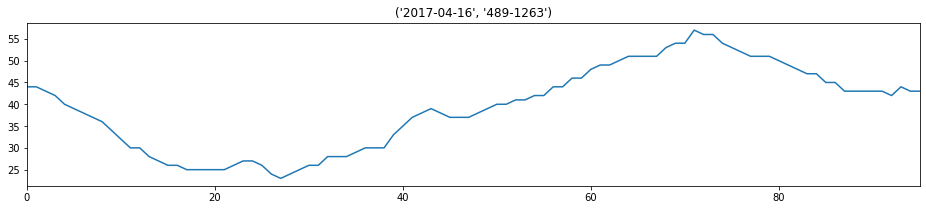

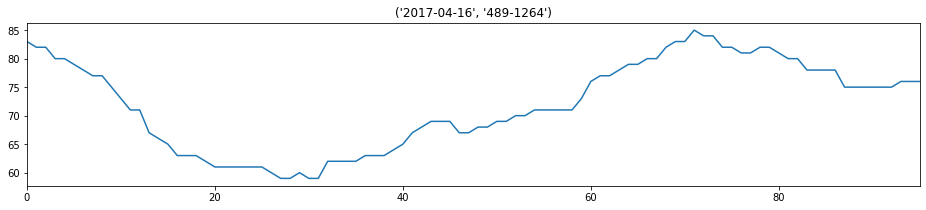

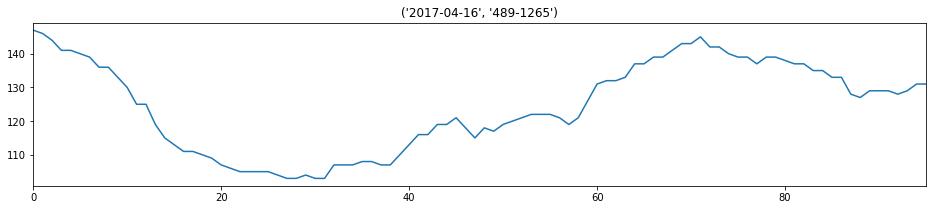

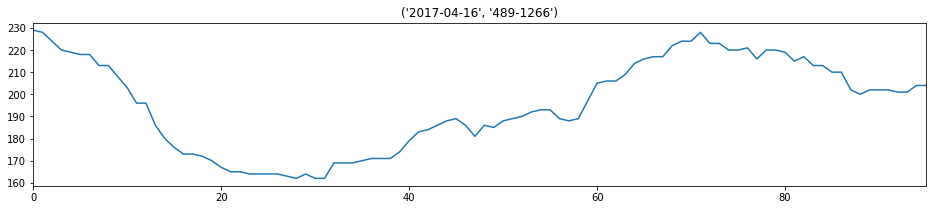

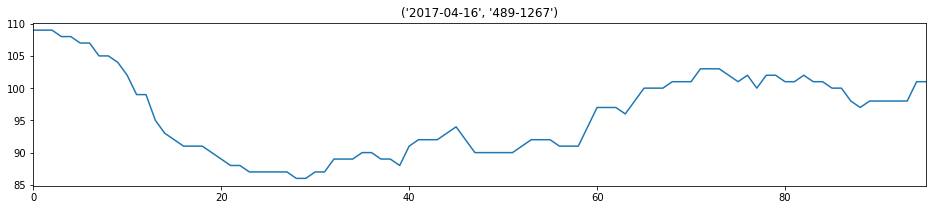

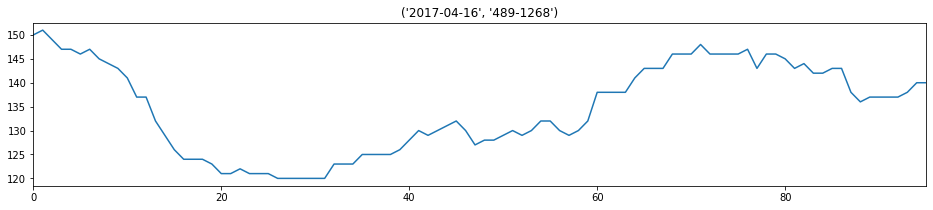

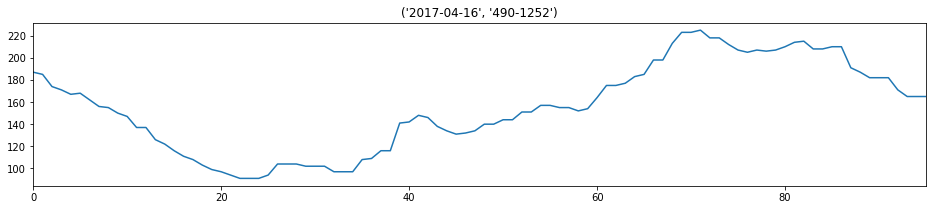

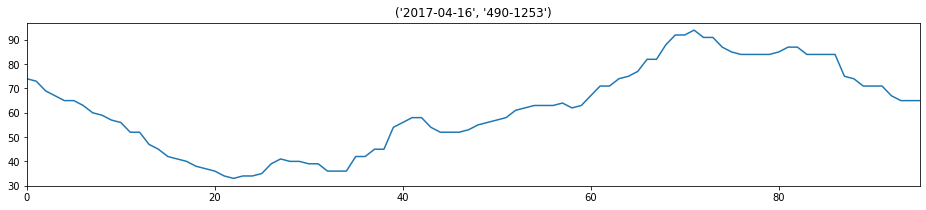

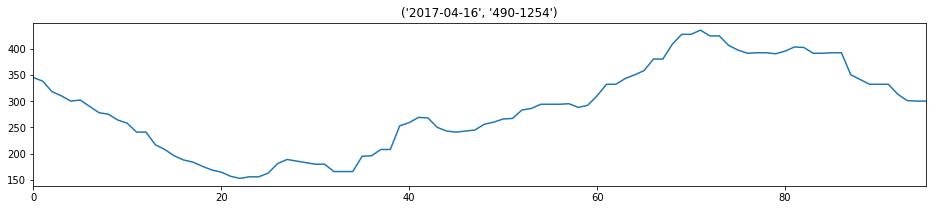

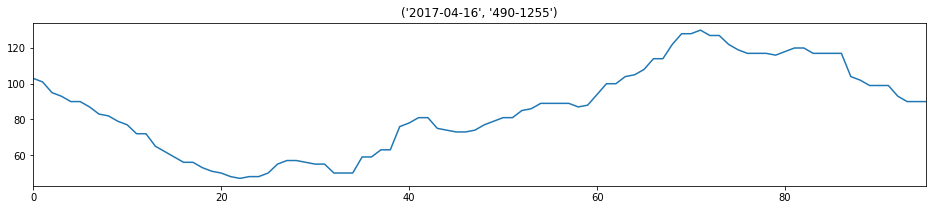

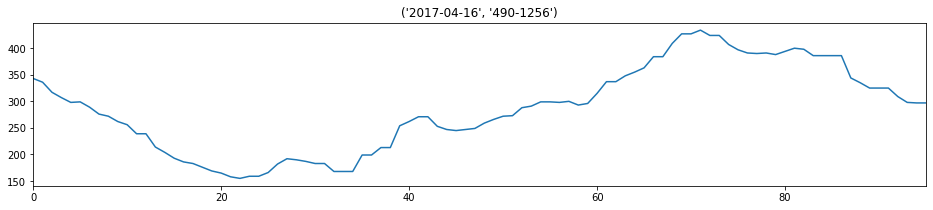

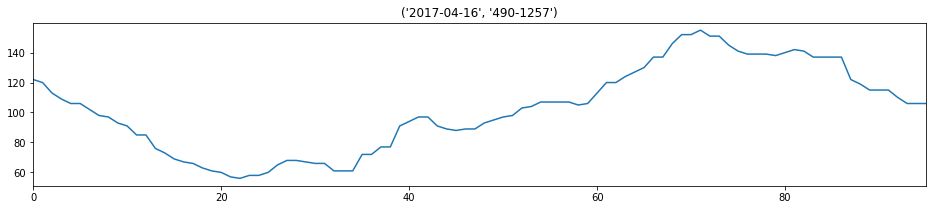

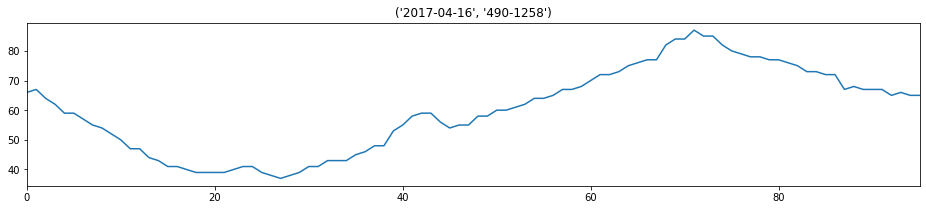

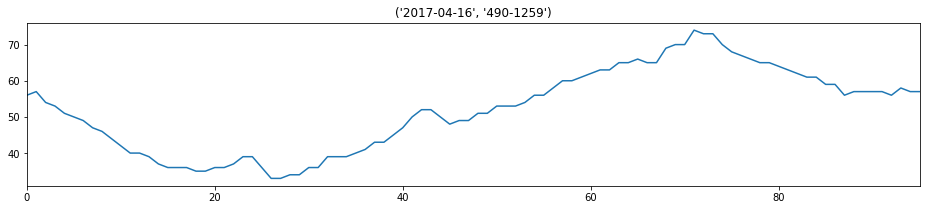

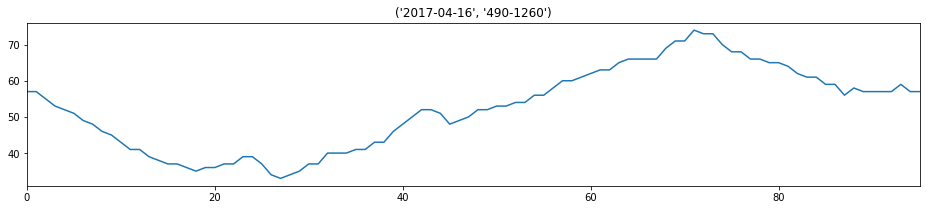

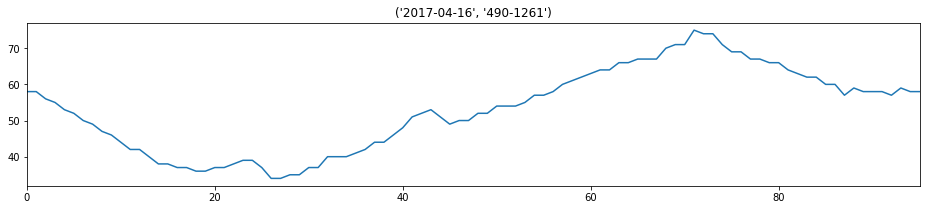

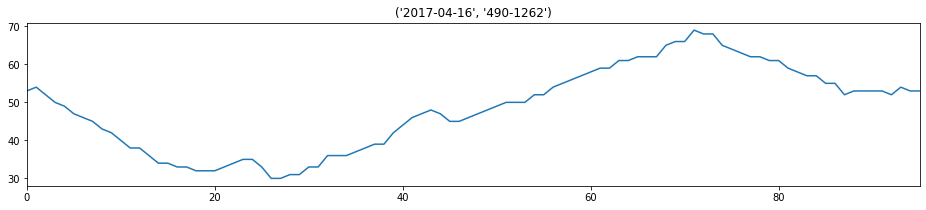

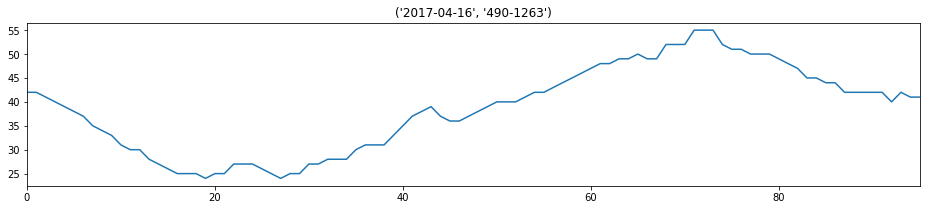

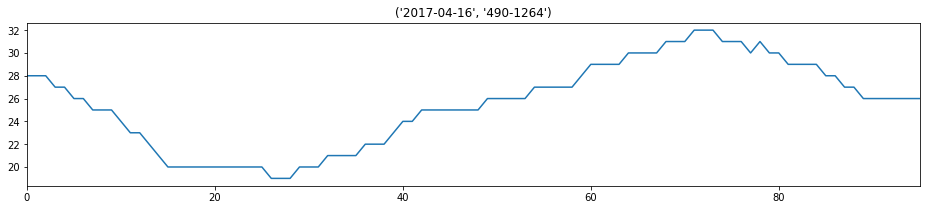

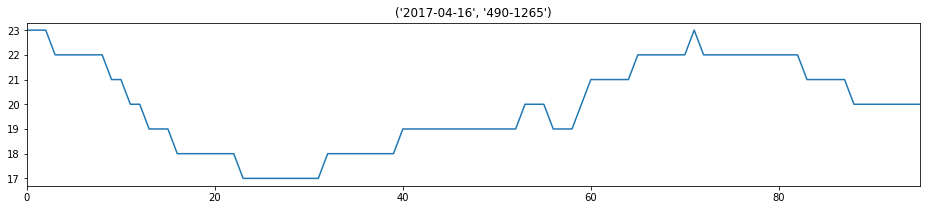

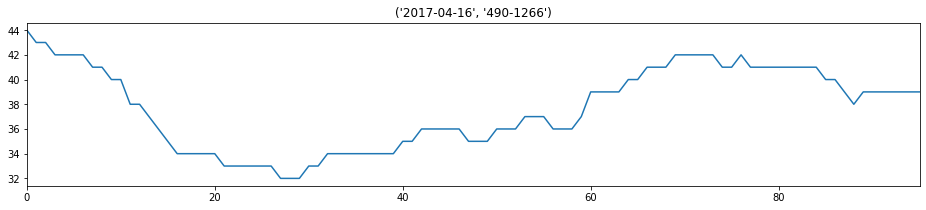

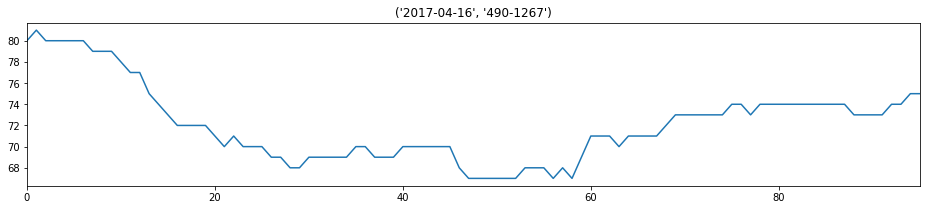

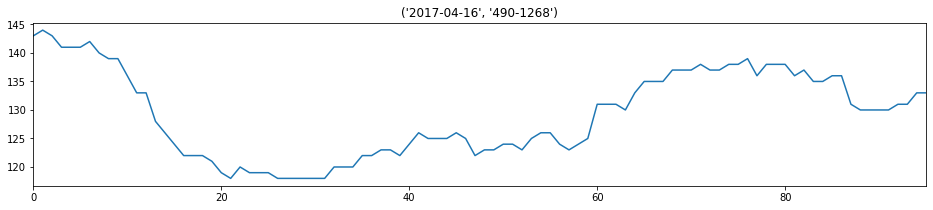

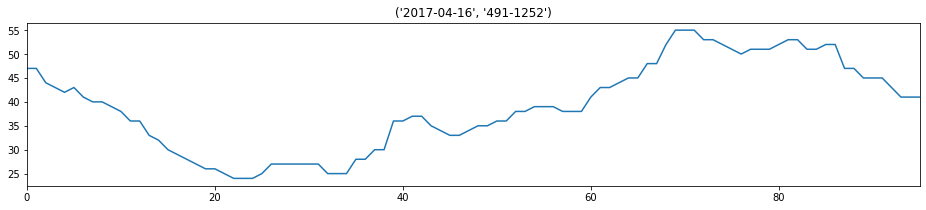

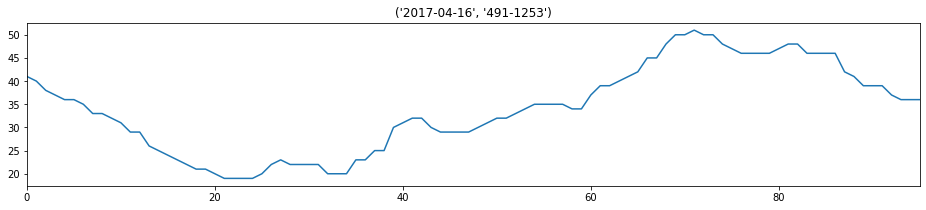

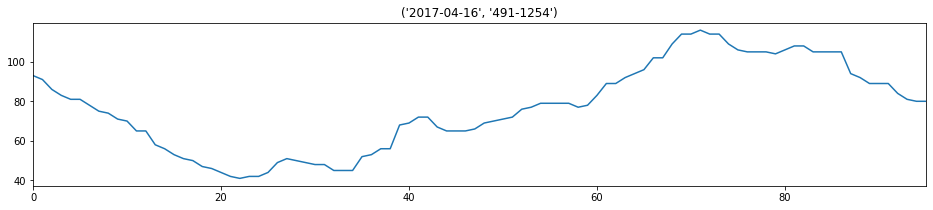

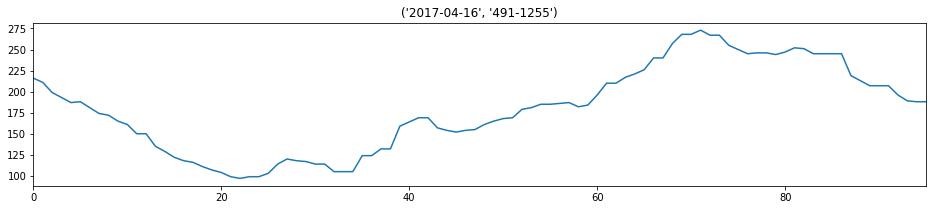

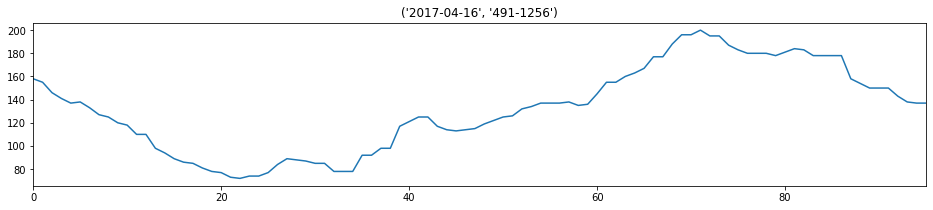

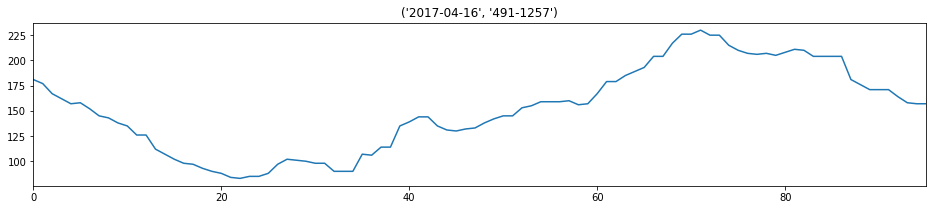

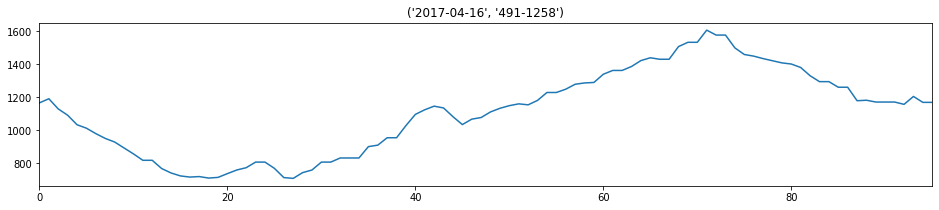

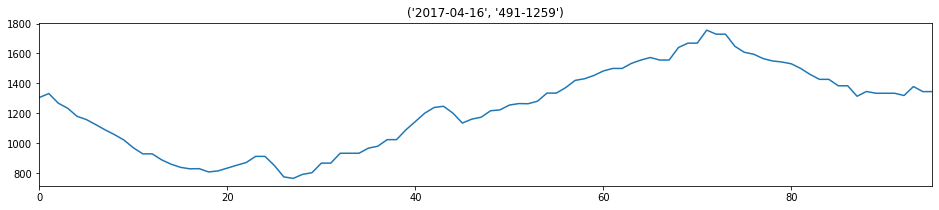

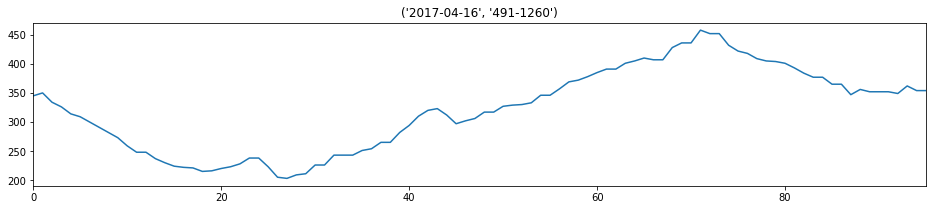

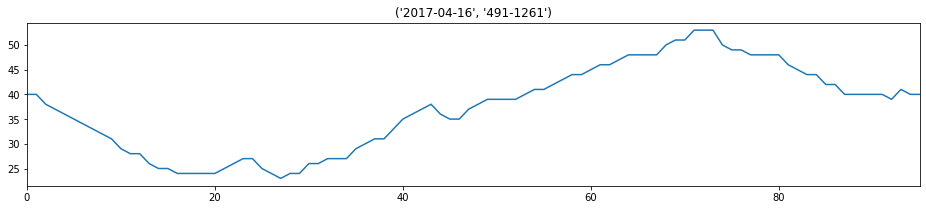

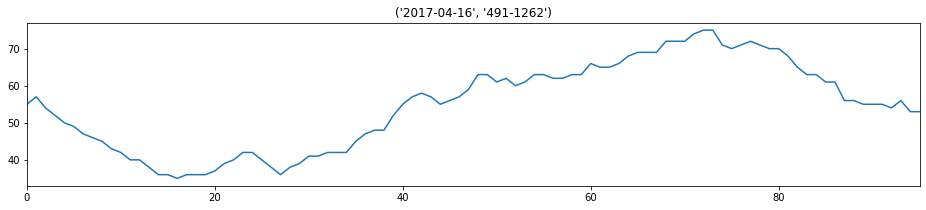

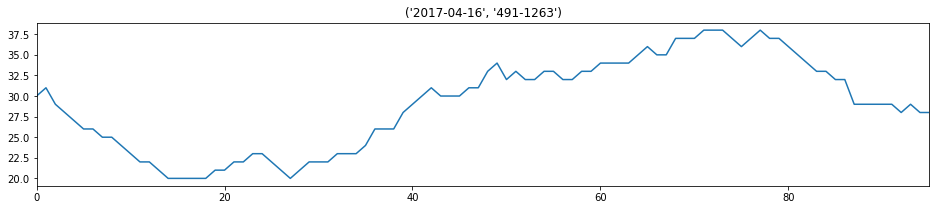

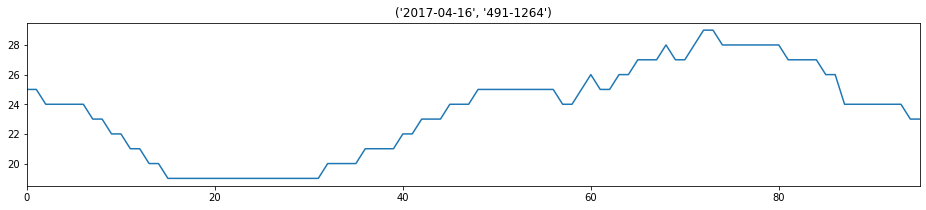

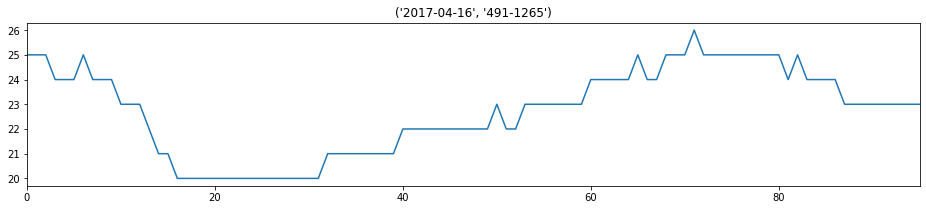

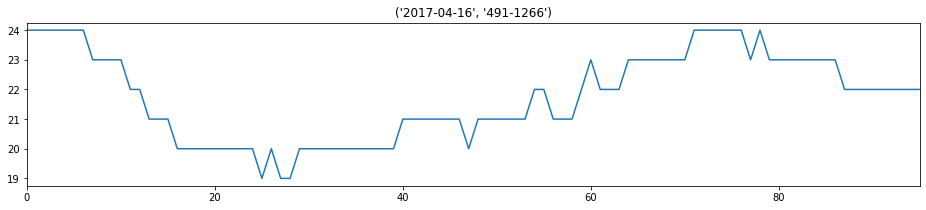

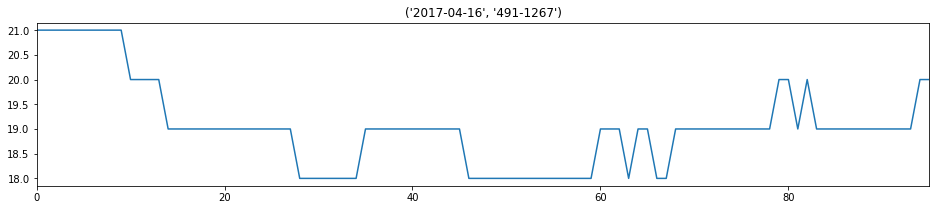

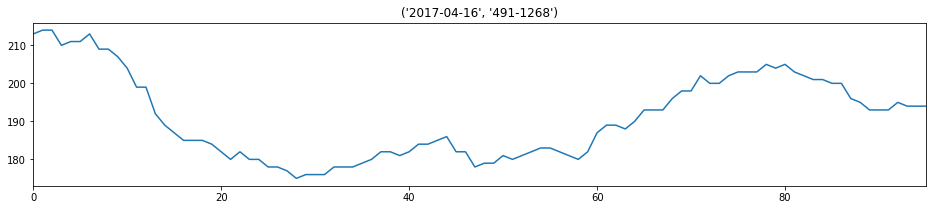

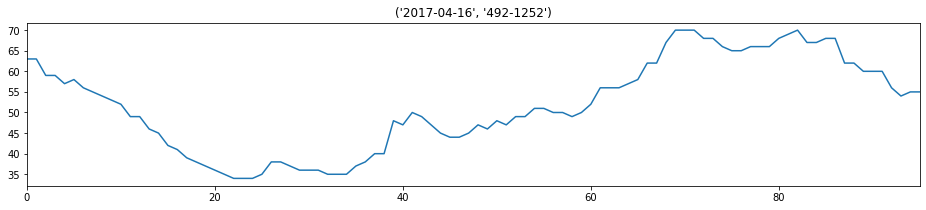

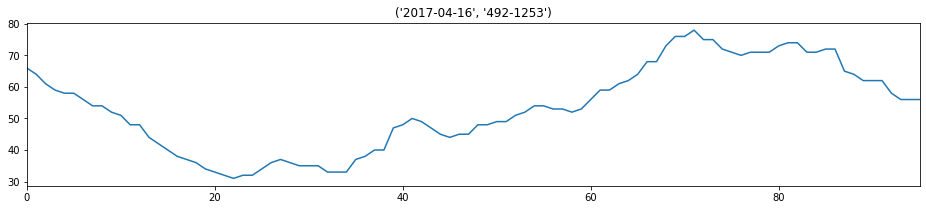

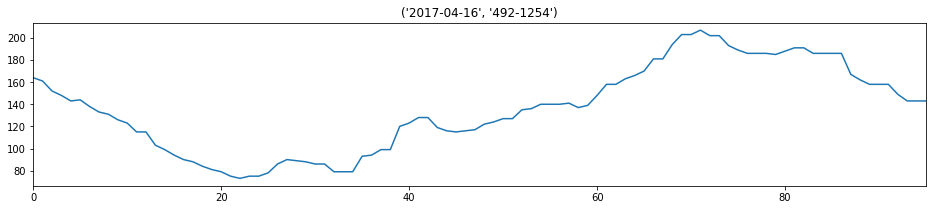

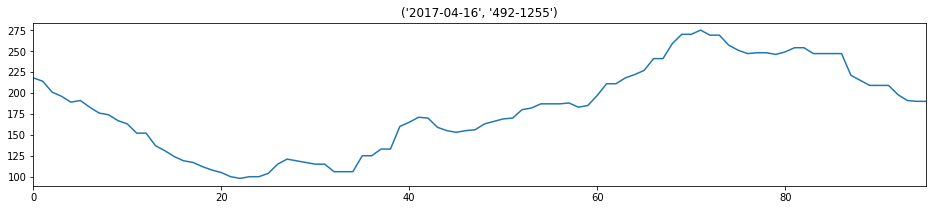

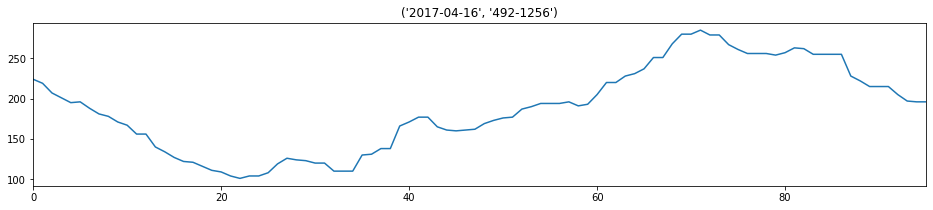

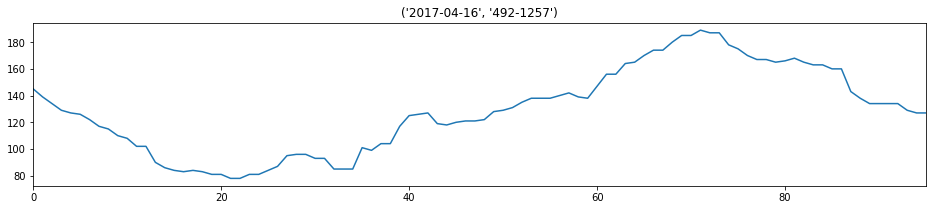

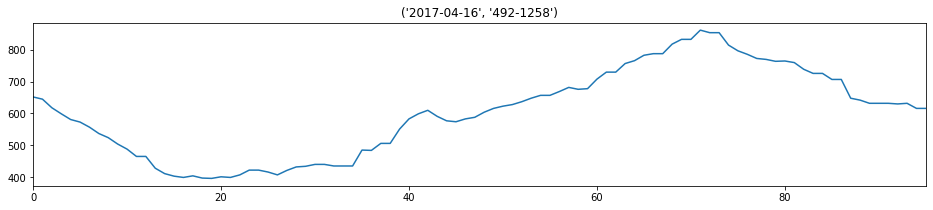

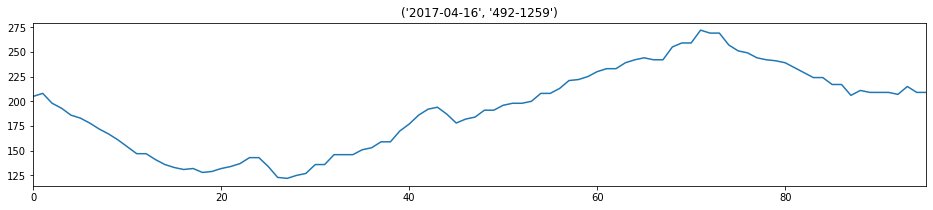

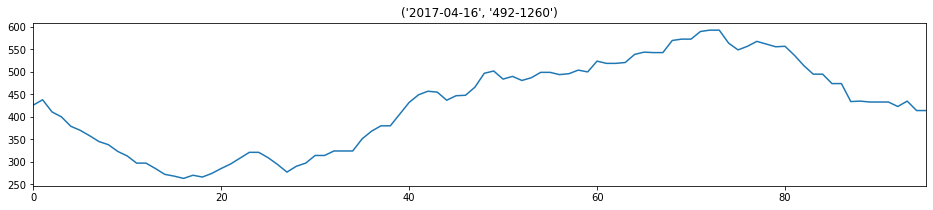

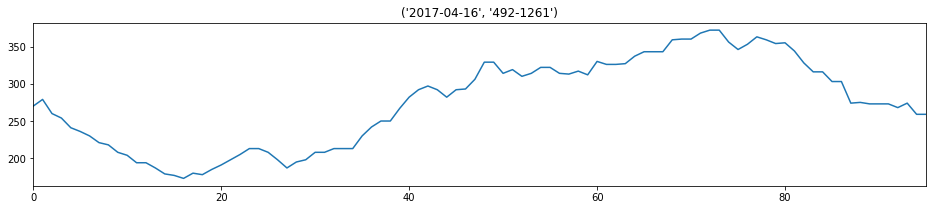

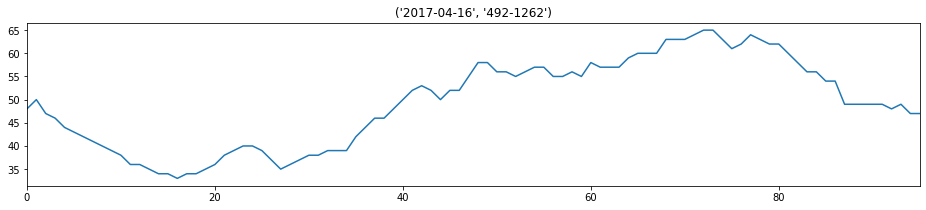

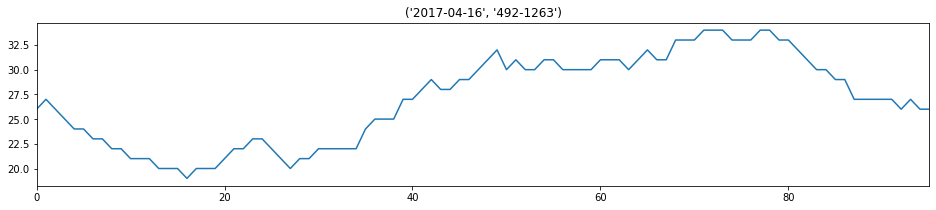

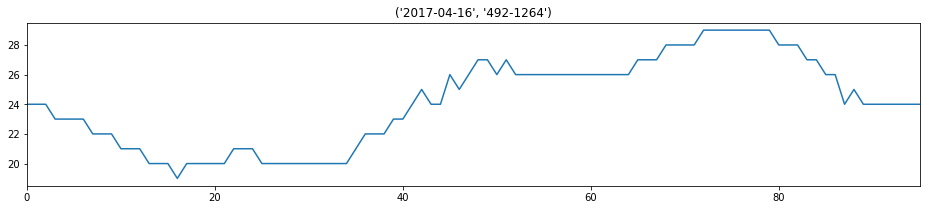

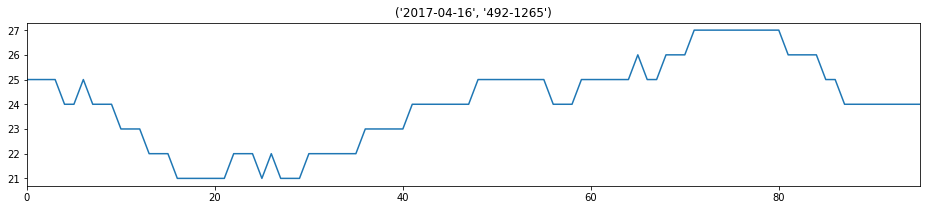

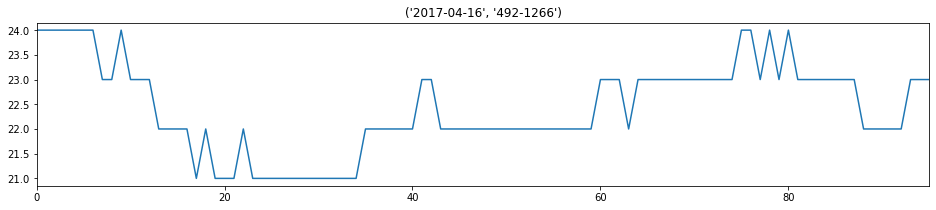

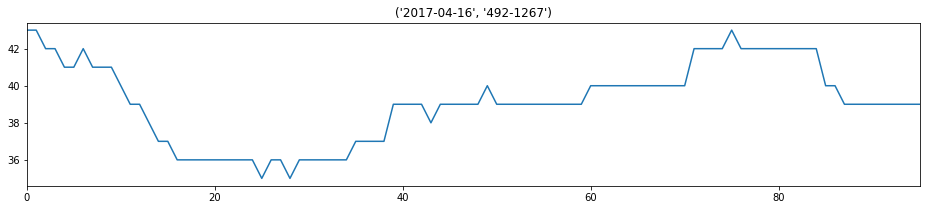

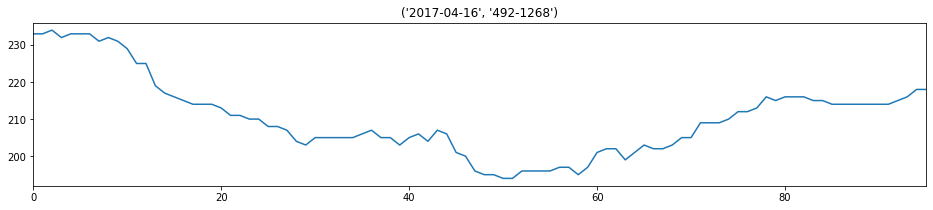

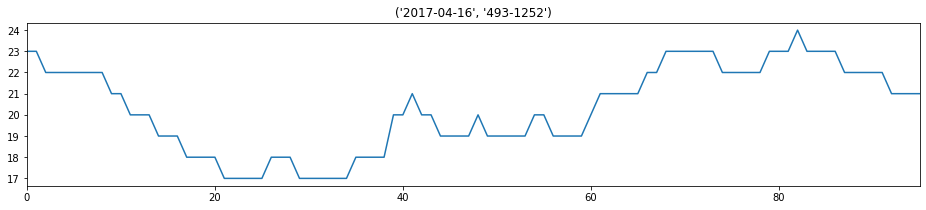

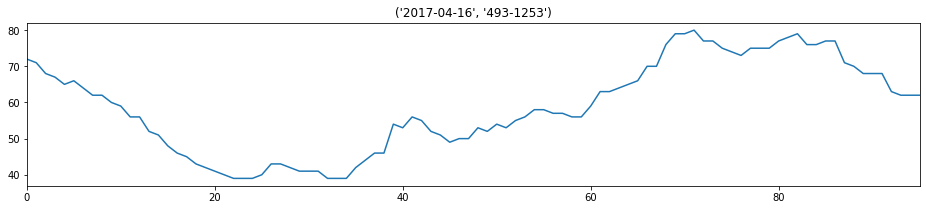

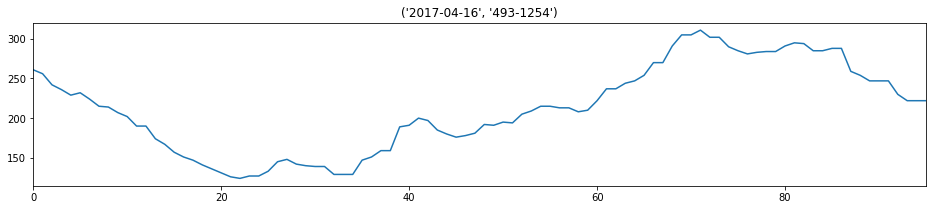

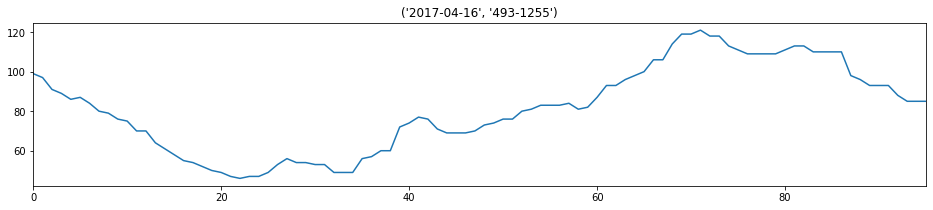

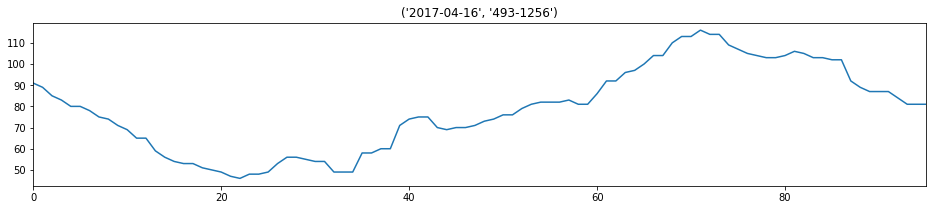

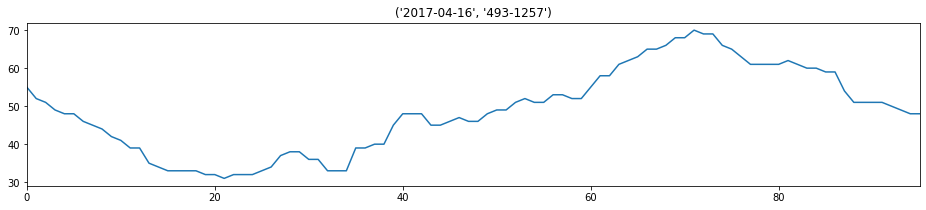

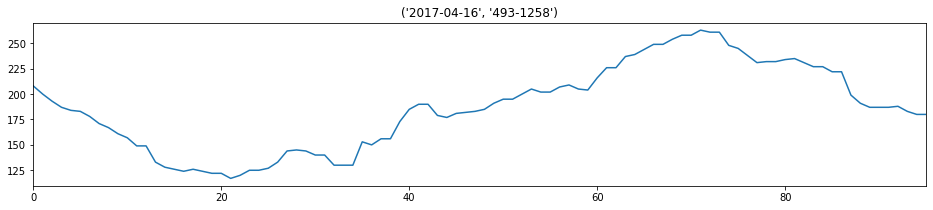

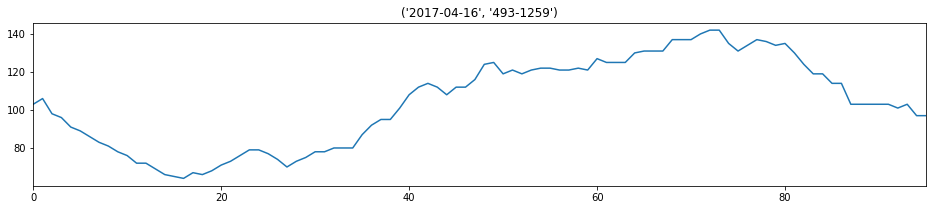

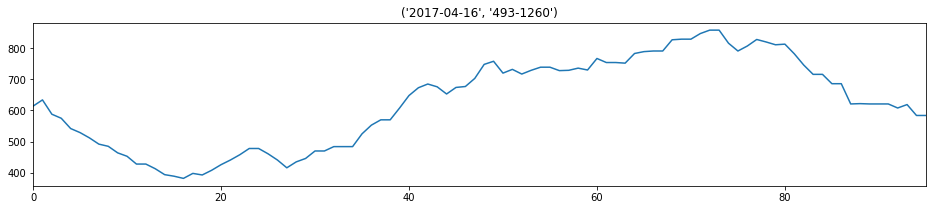

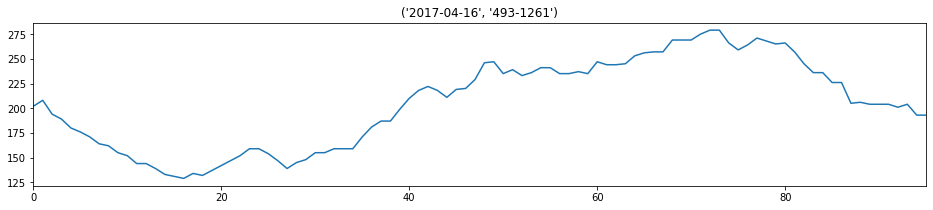

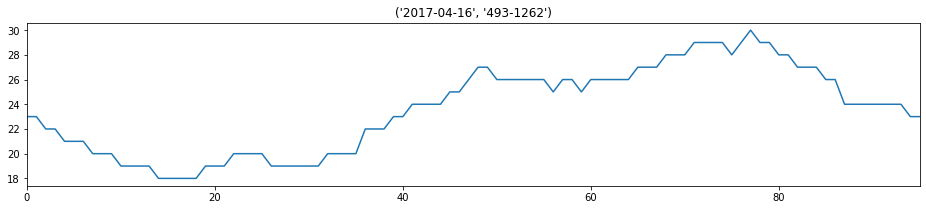

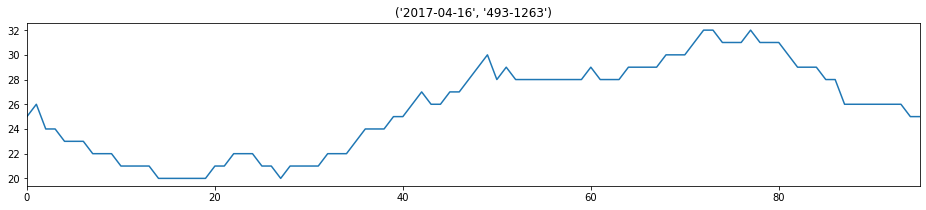

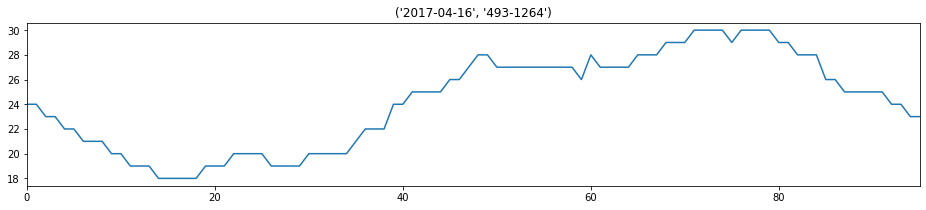

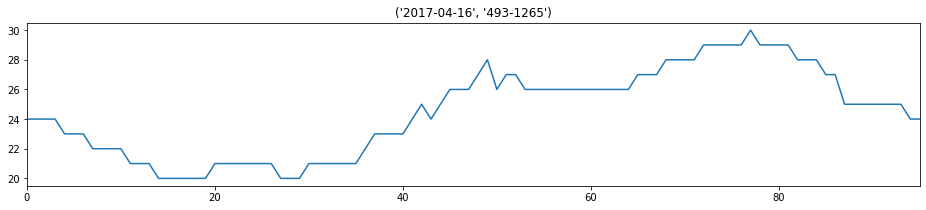

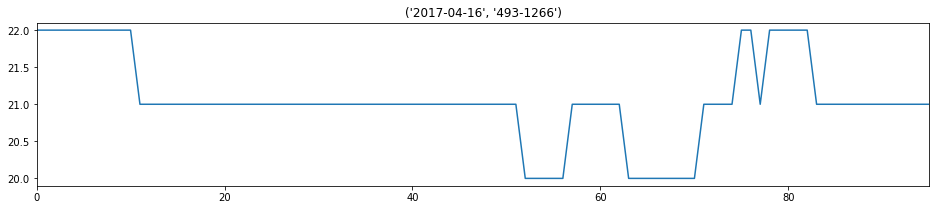

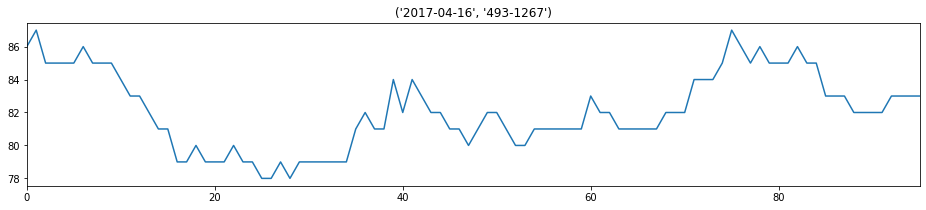

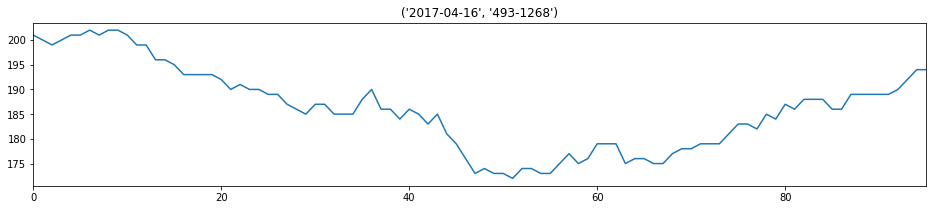

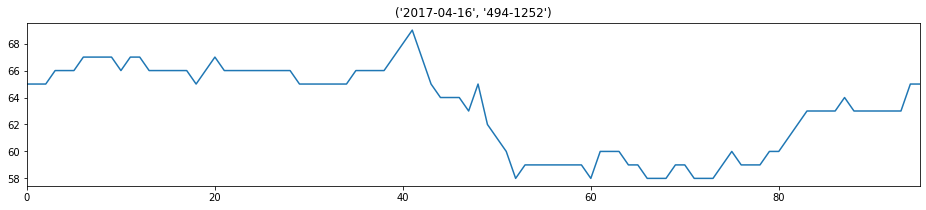

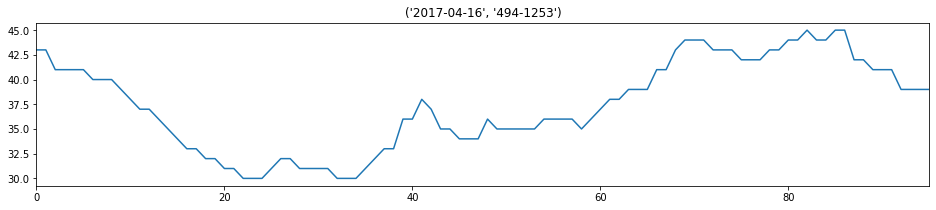

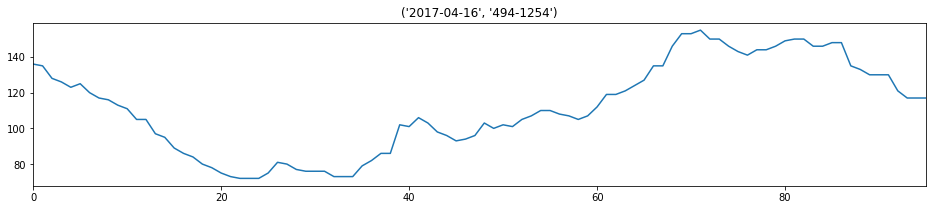

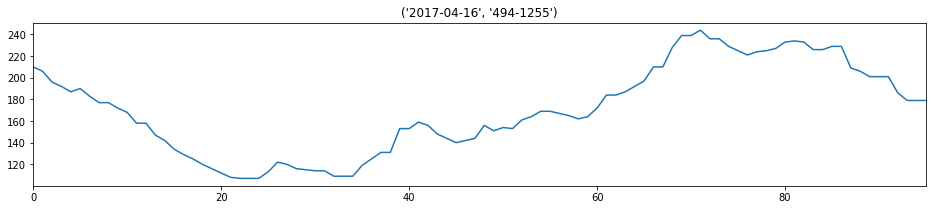

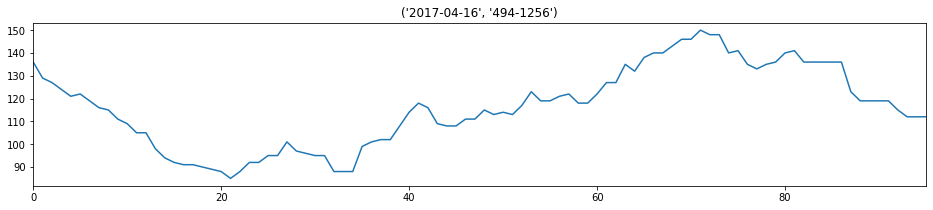

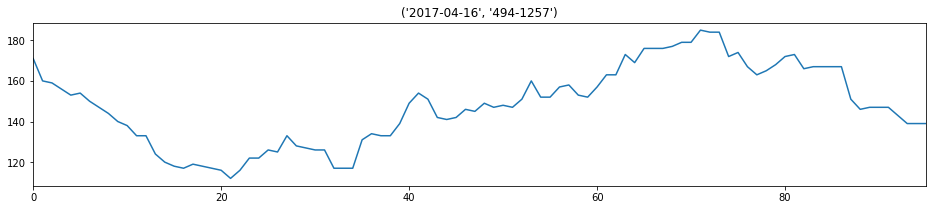

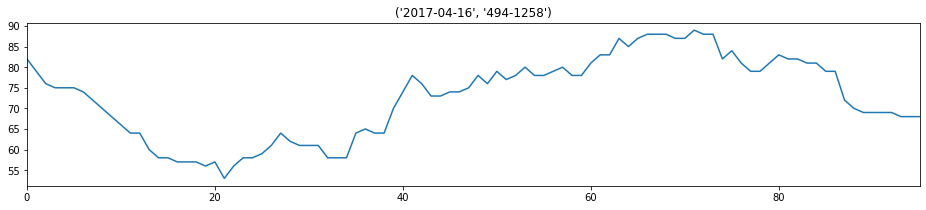

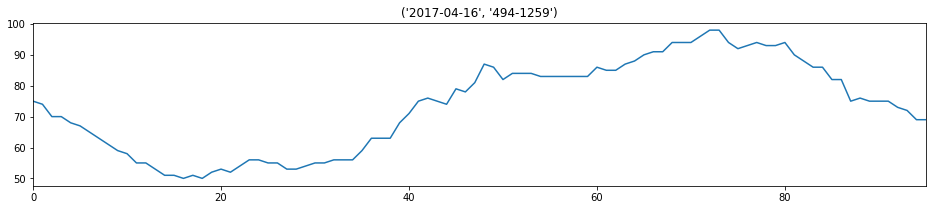

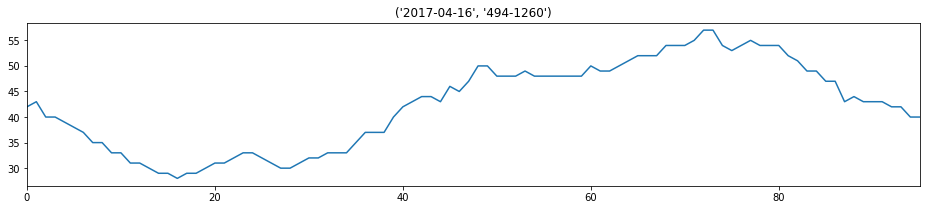

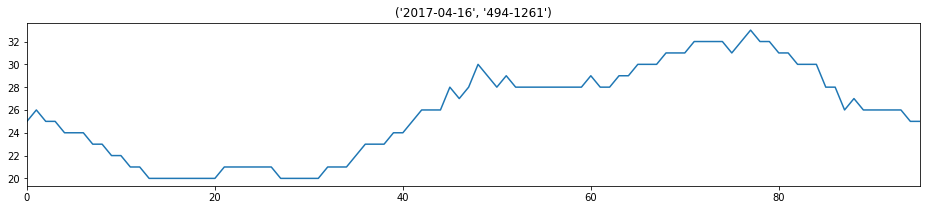

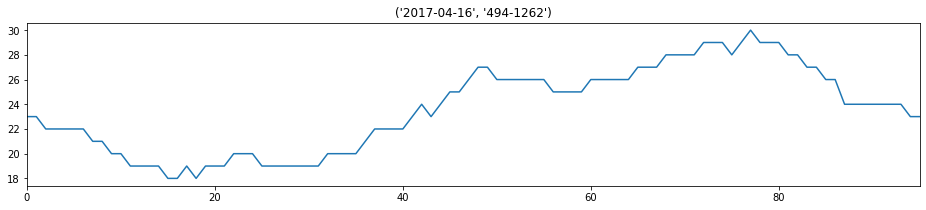

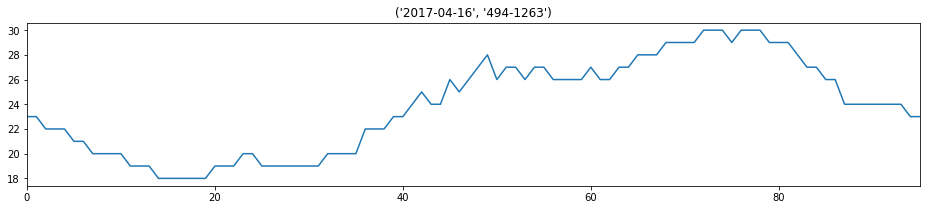

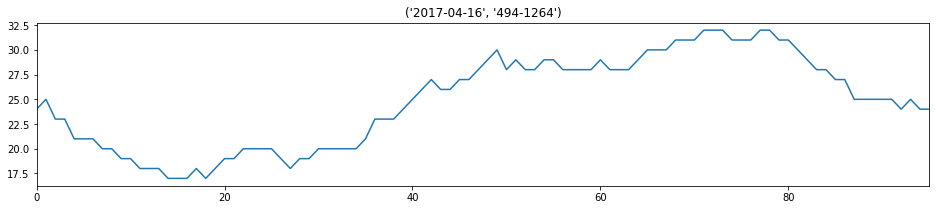

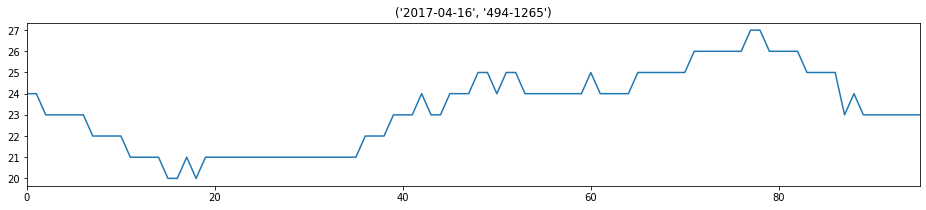

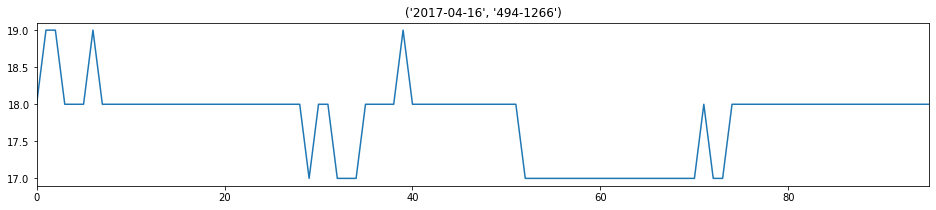

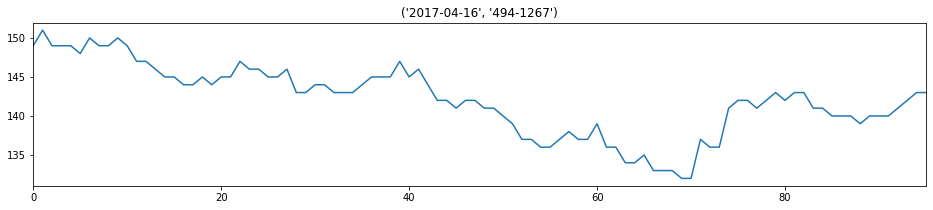

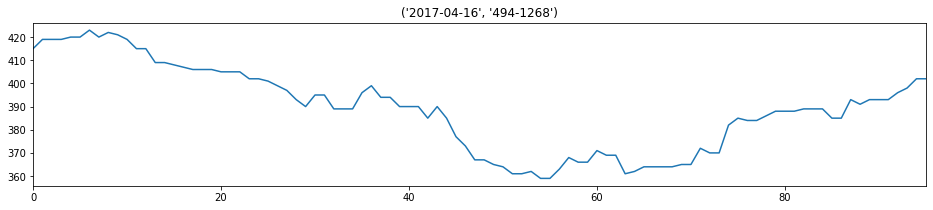

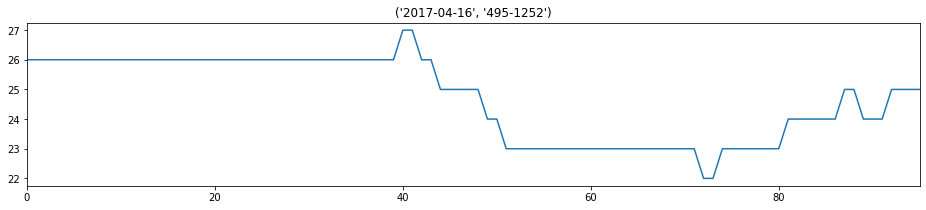

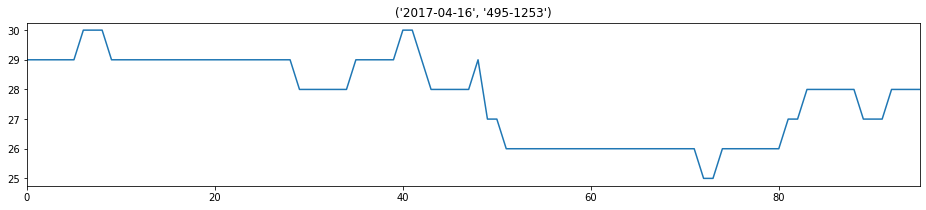

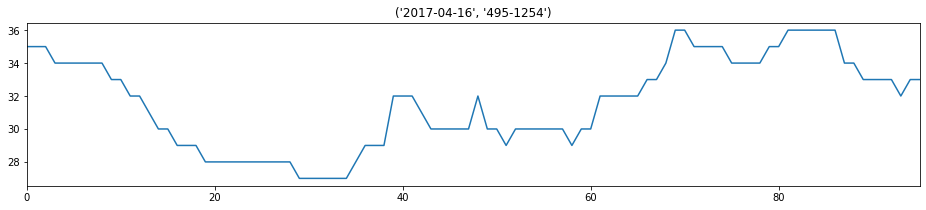

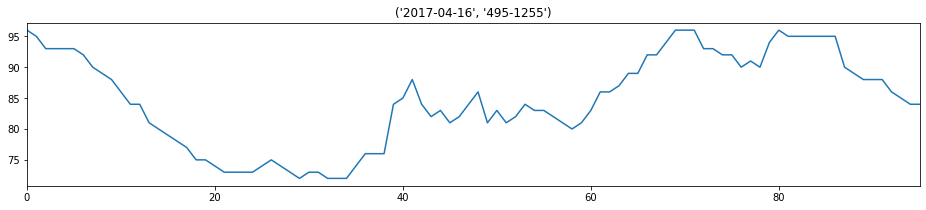

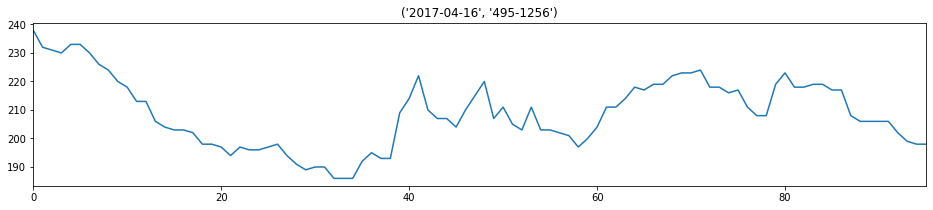

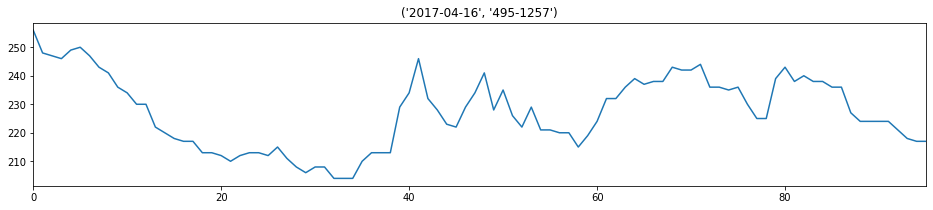

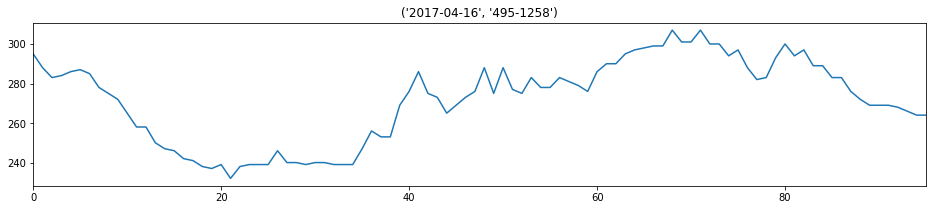

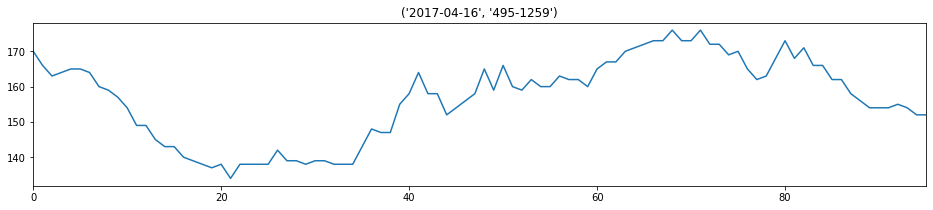

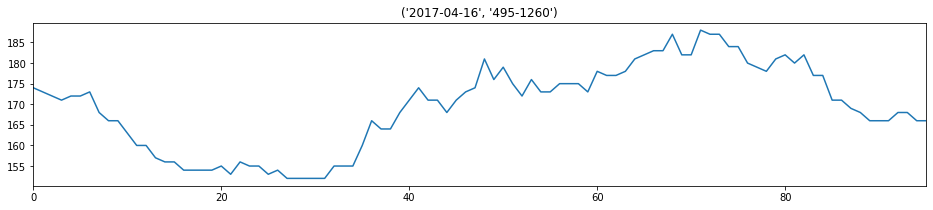

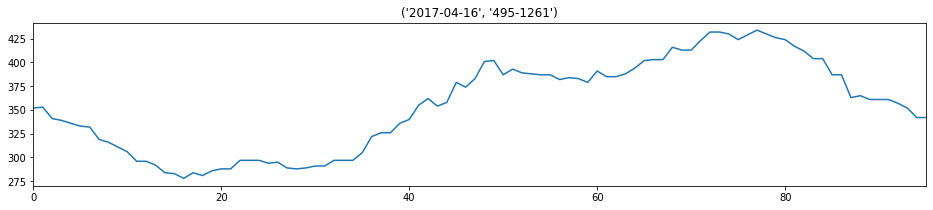

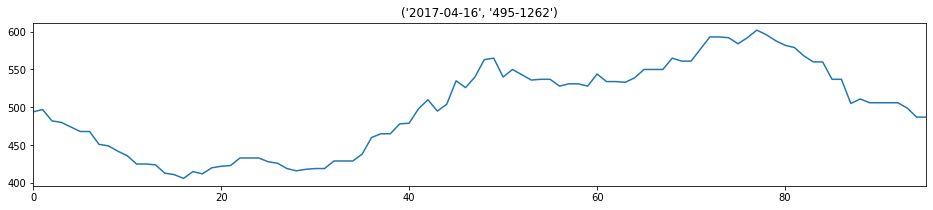

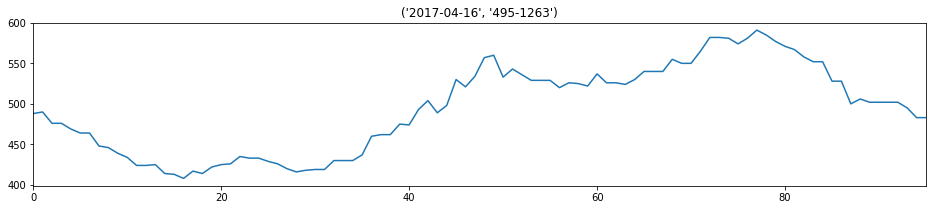

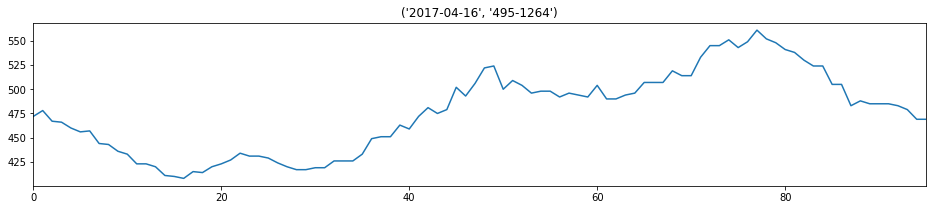

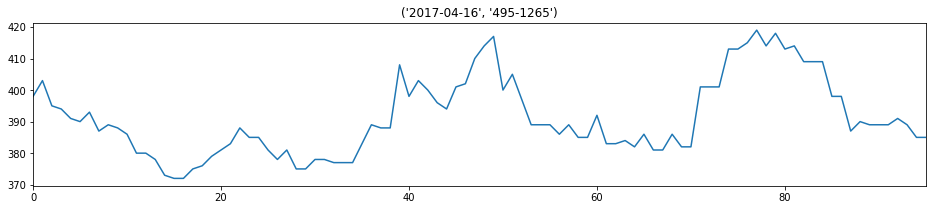

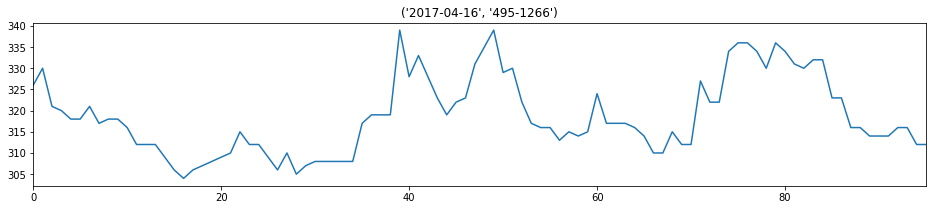

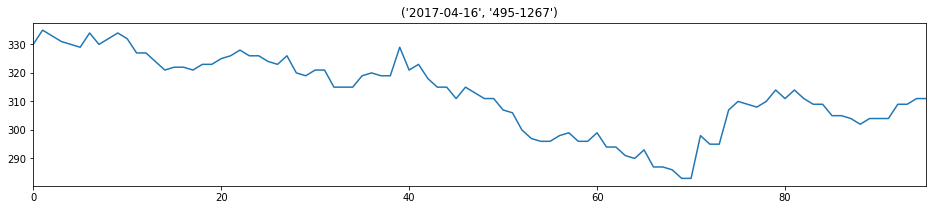

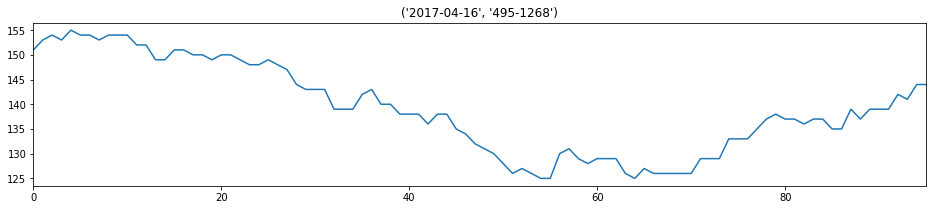

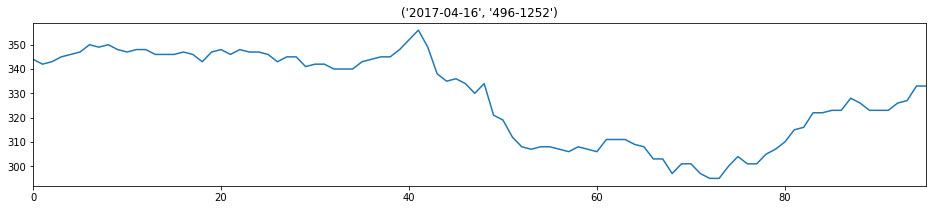

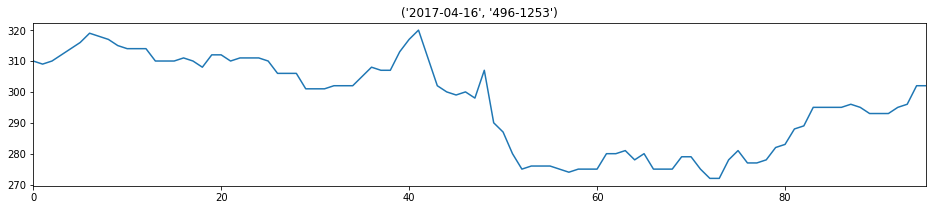

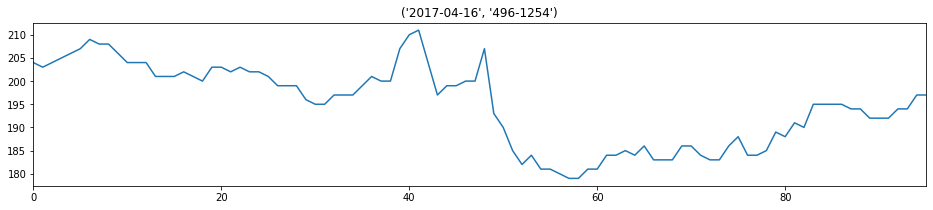

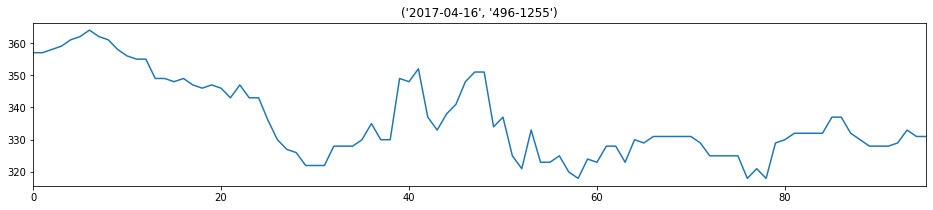

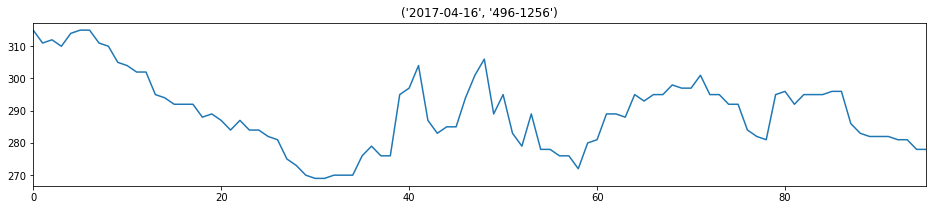

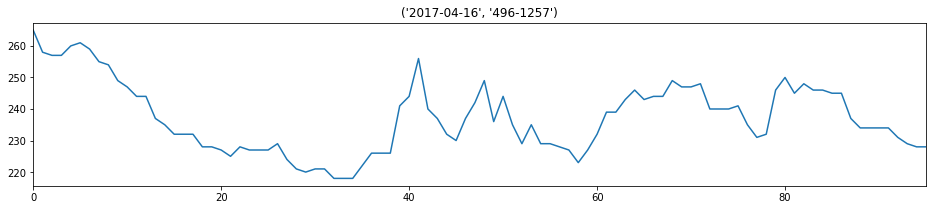

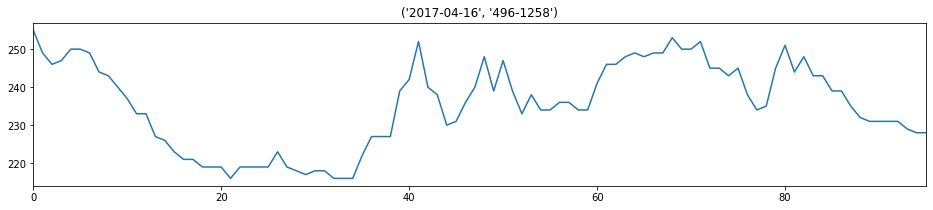

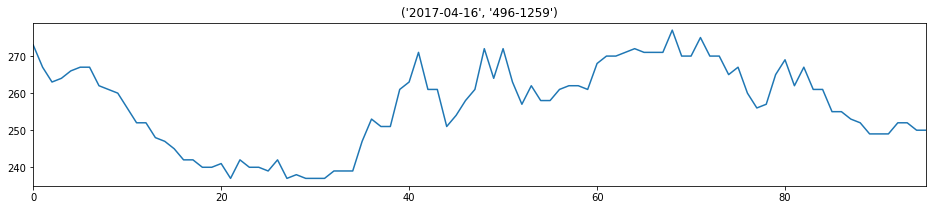

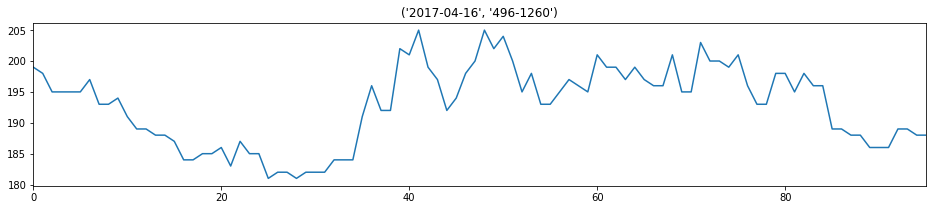

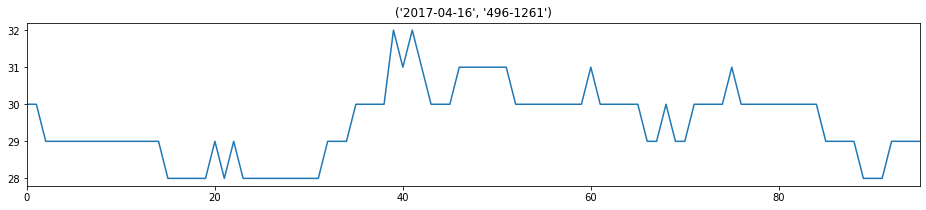

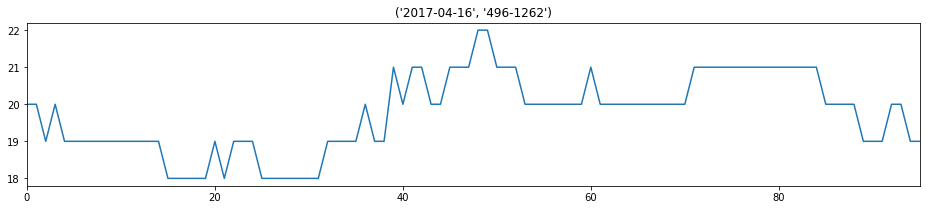

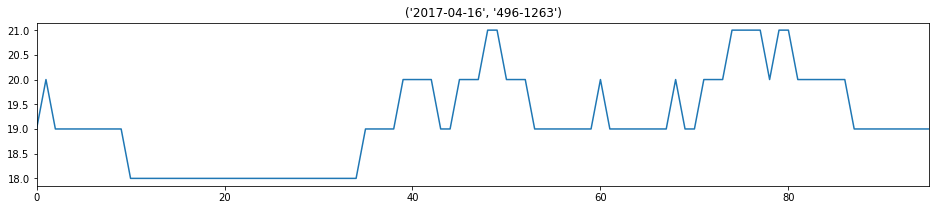

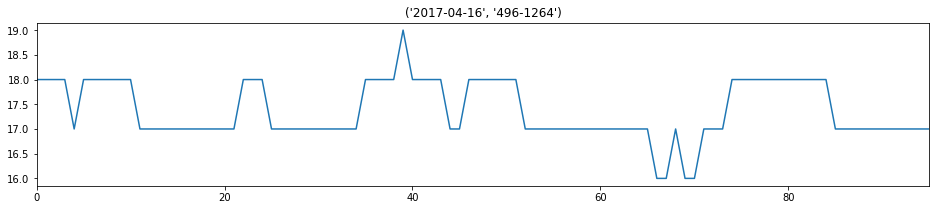

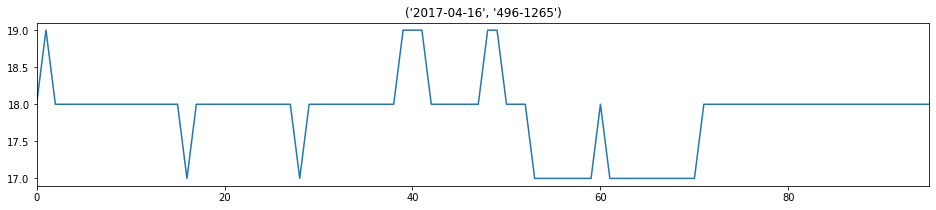

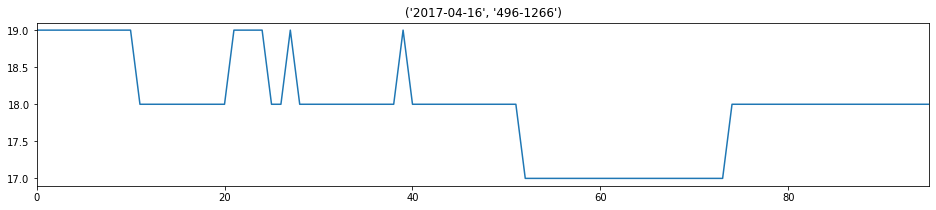

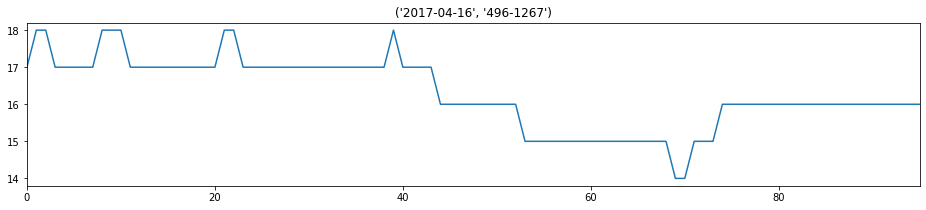

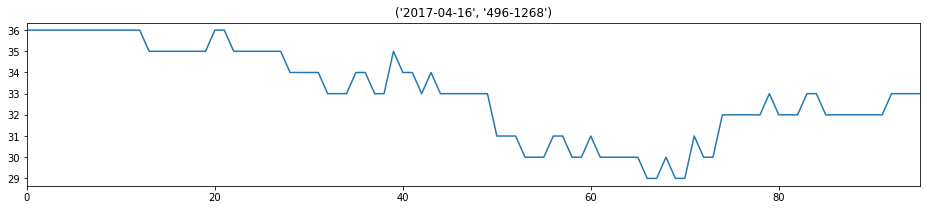

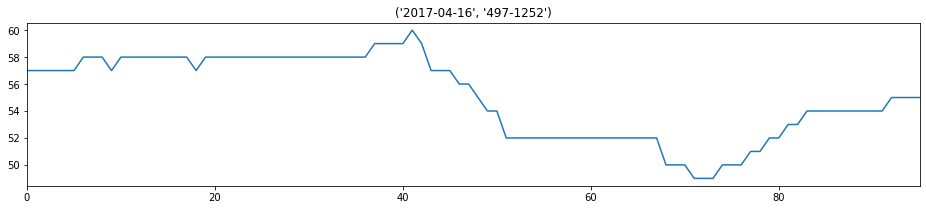

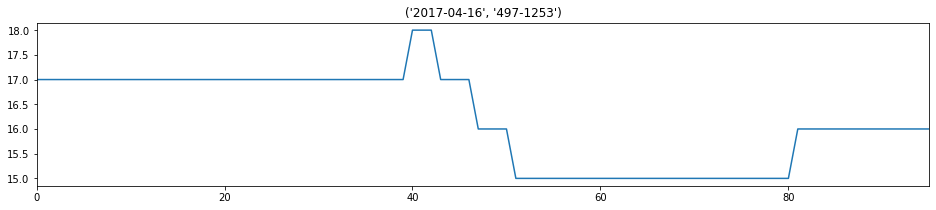

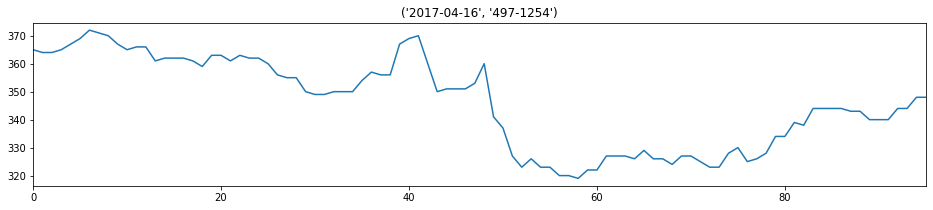

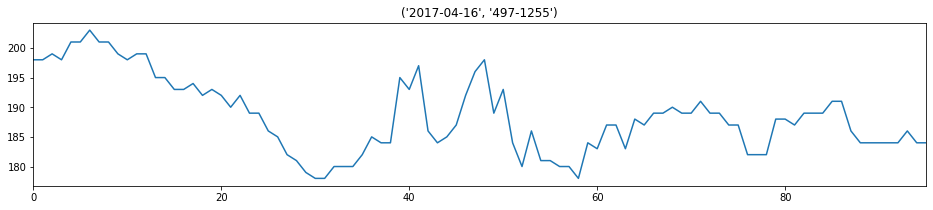

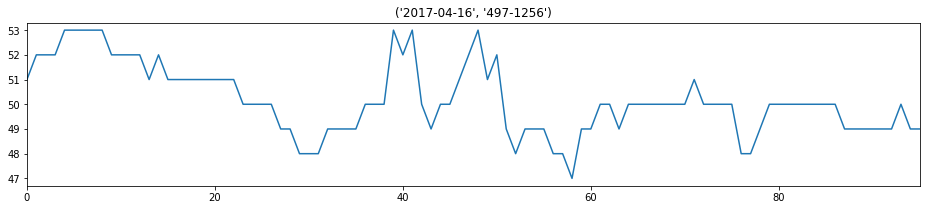

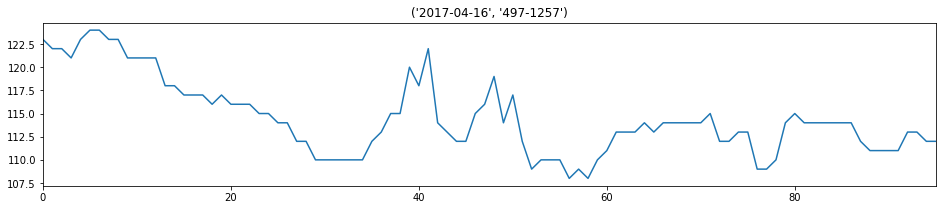

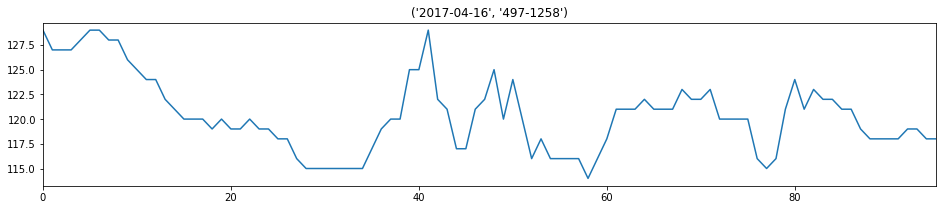

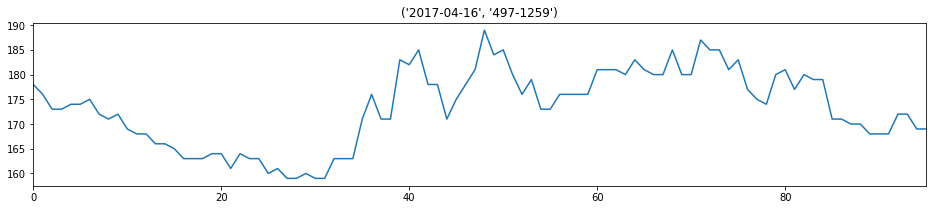

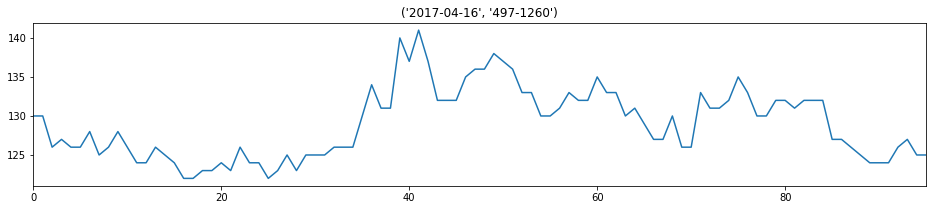

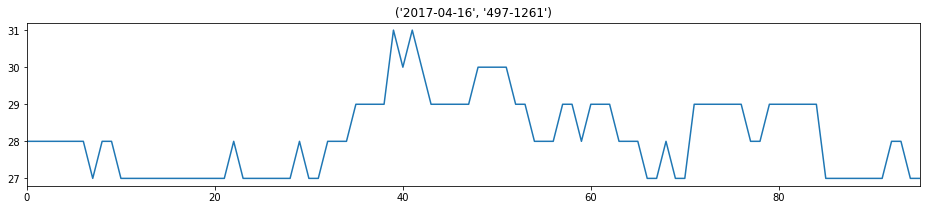

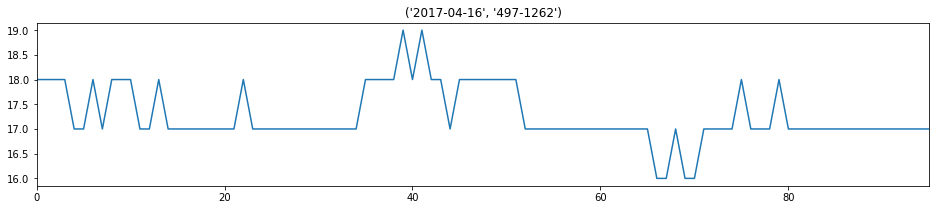

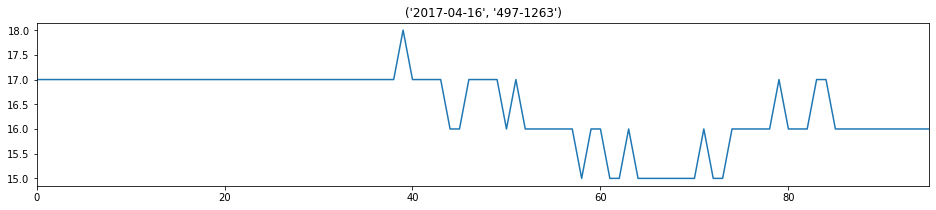

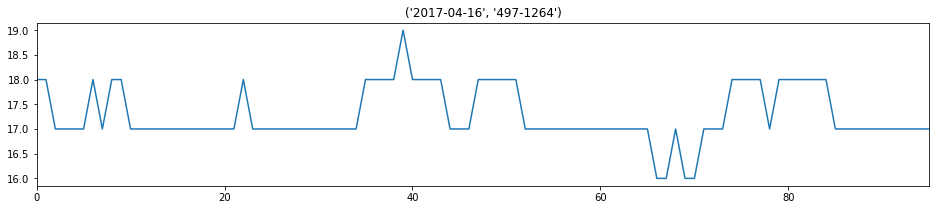

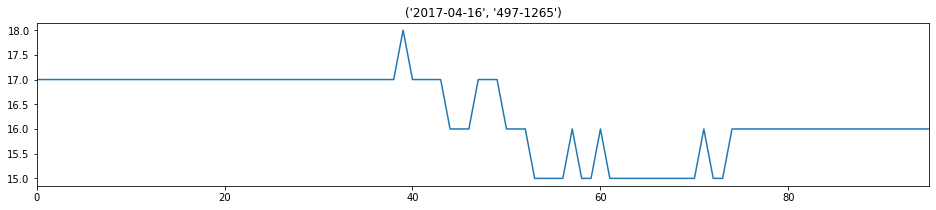

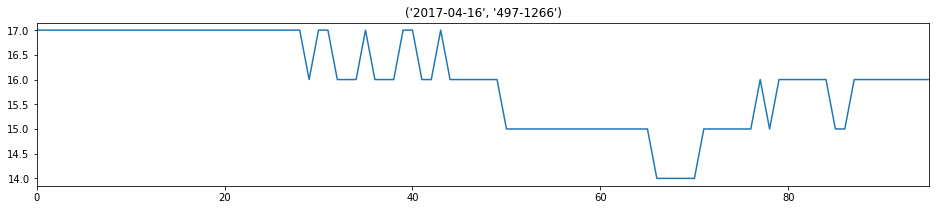

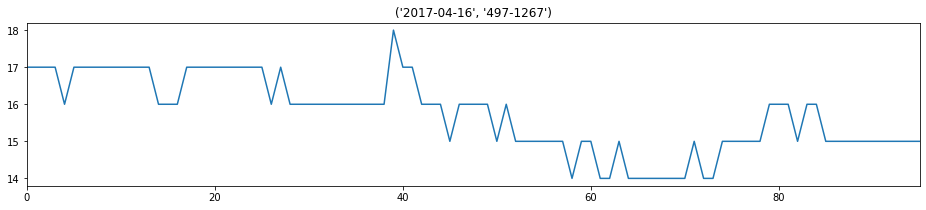

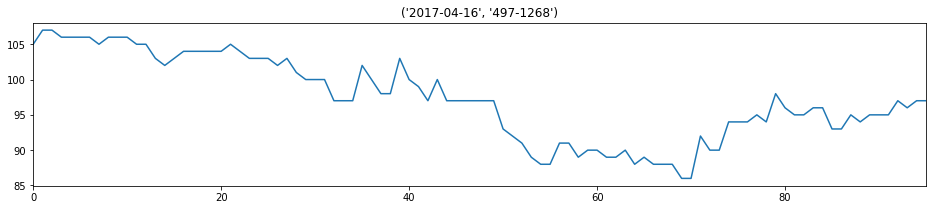

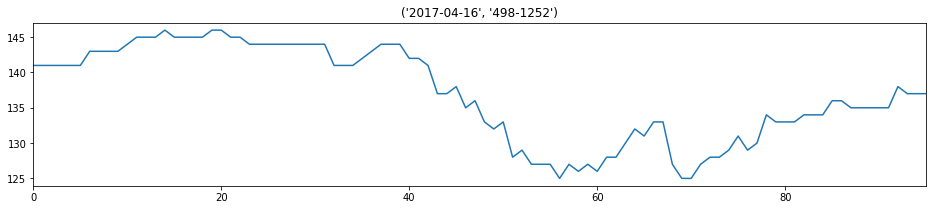

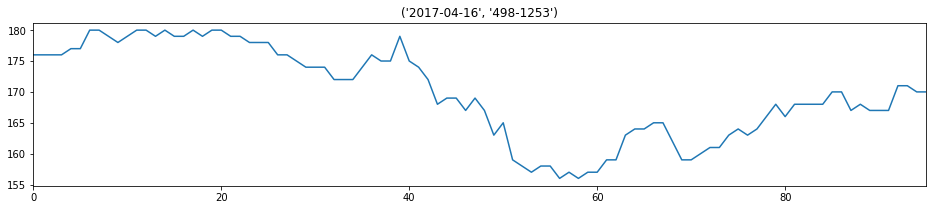

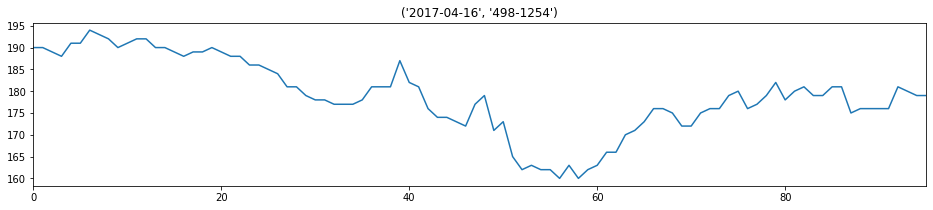

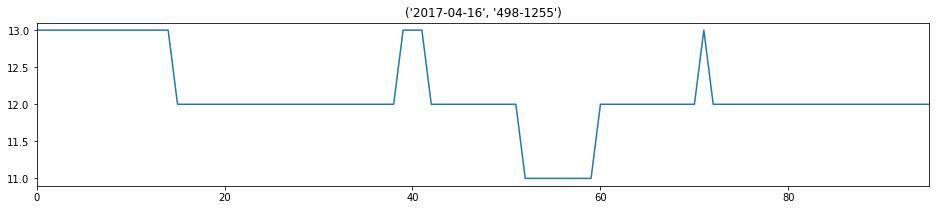

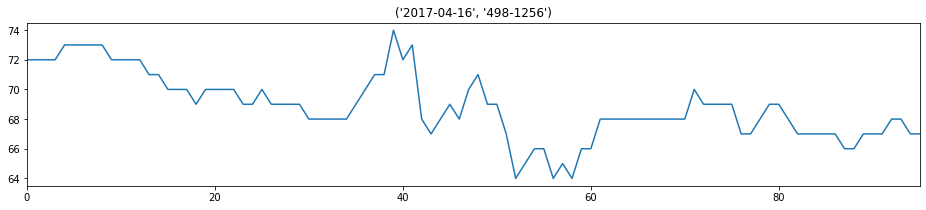

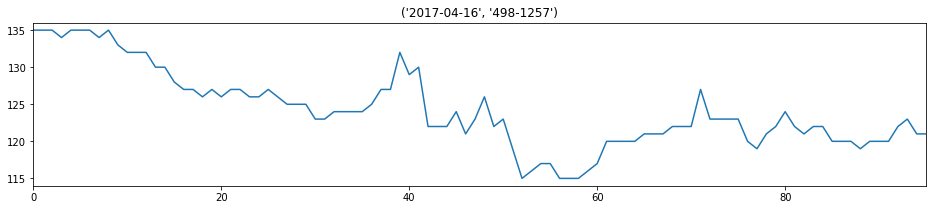

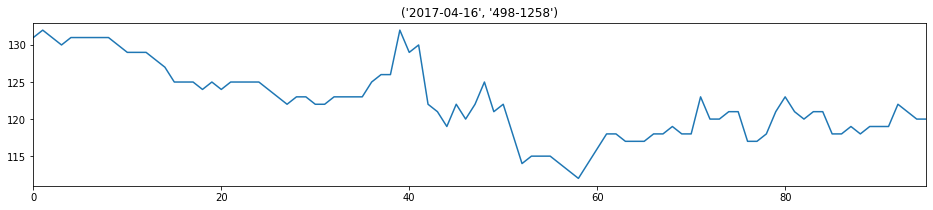

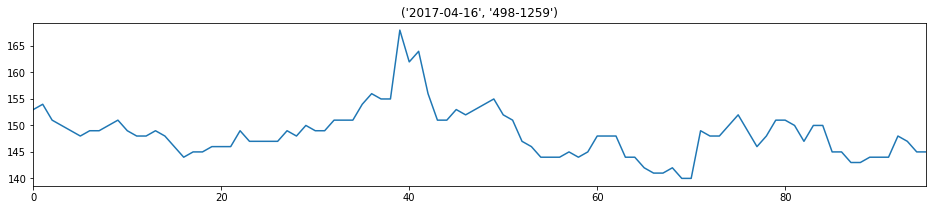

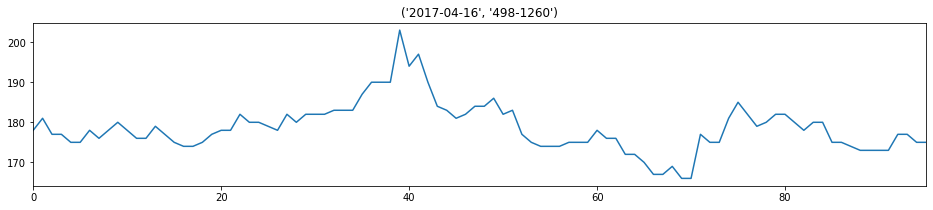

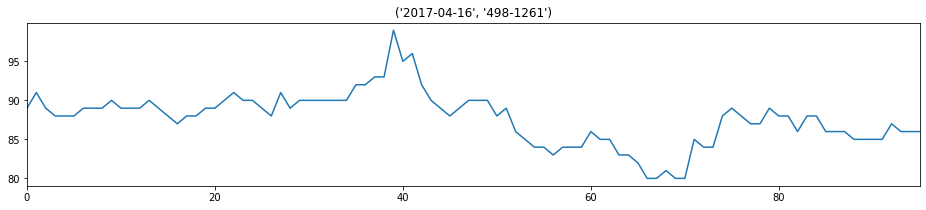

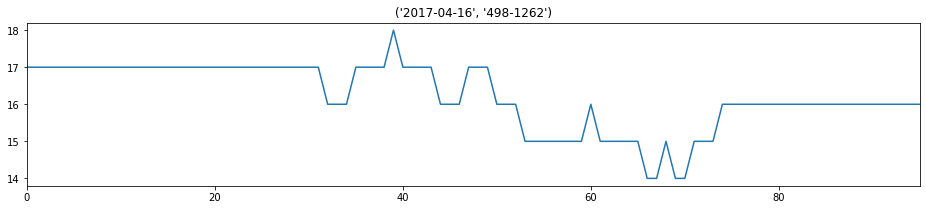

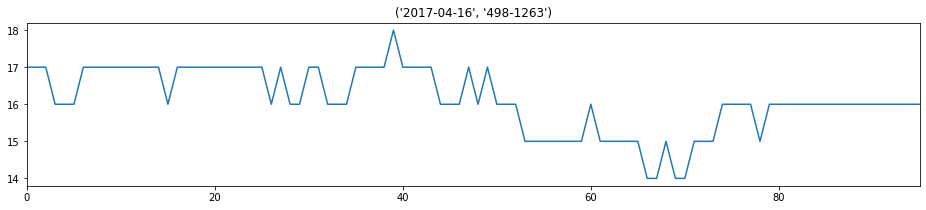

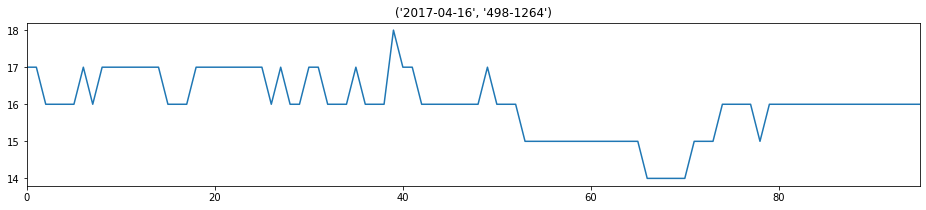

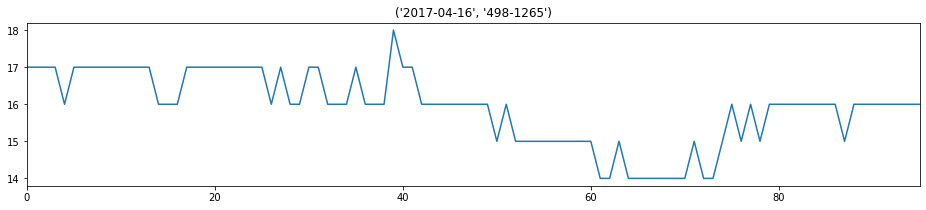

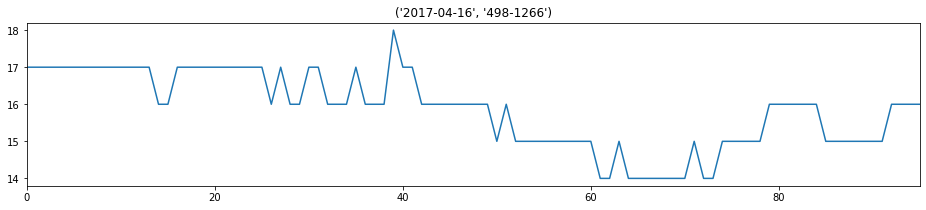

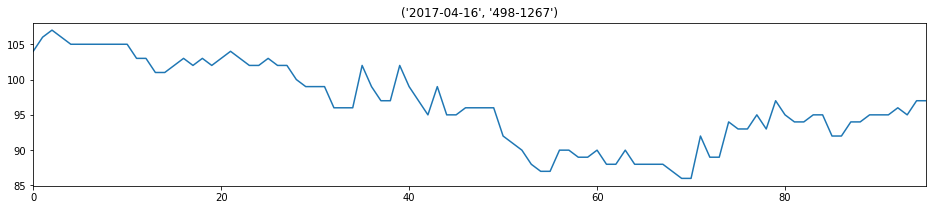

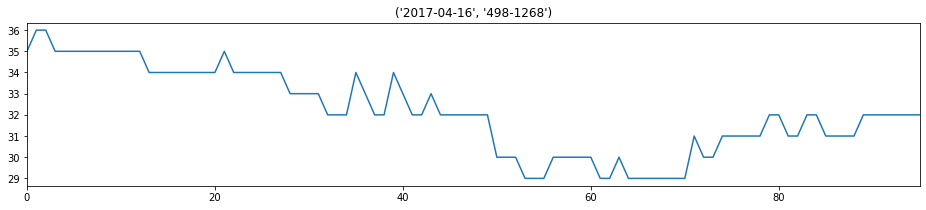

In [15]:
count = 0
for i, k in agg_by_cell_day:
    count +=1
    if count > 221: break
    plt.figure(figsize = (16, 3))  
    k = k['nr_people'].reset_index(drop= True)
    plt.title(i)
    k.plot() 
    plt.show()

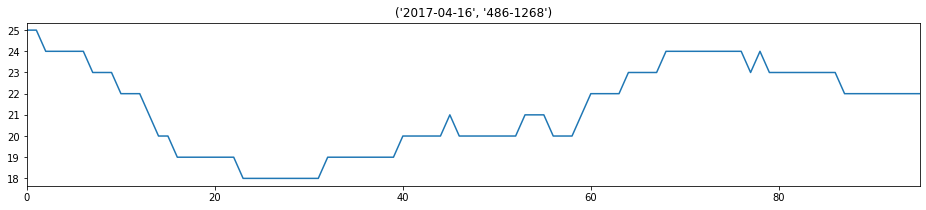

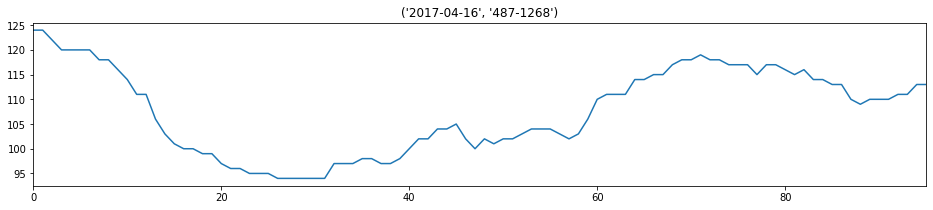

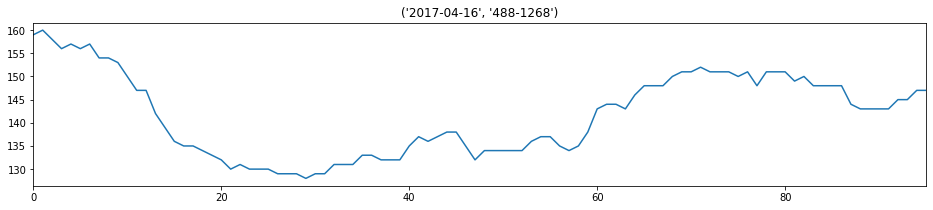

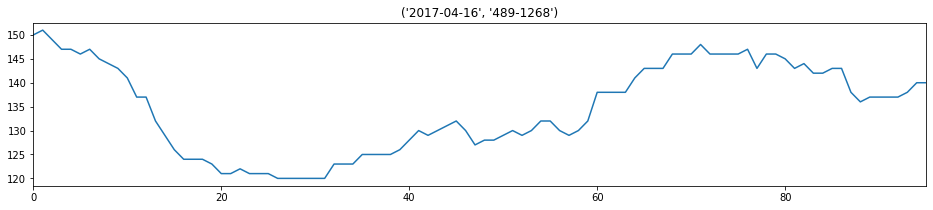

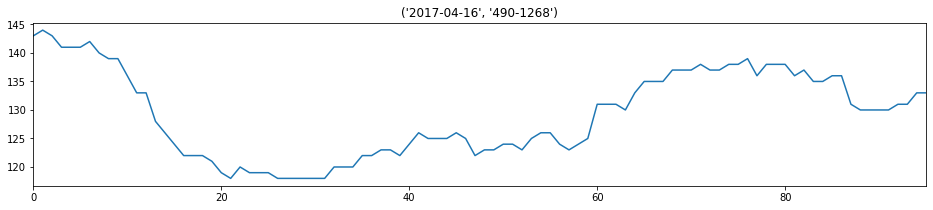

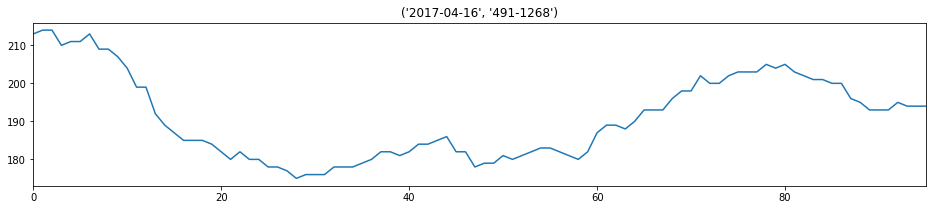

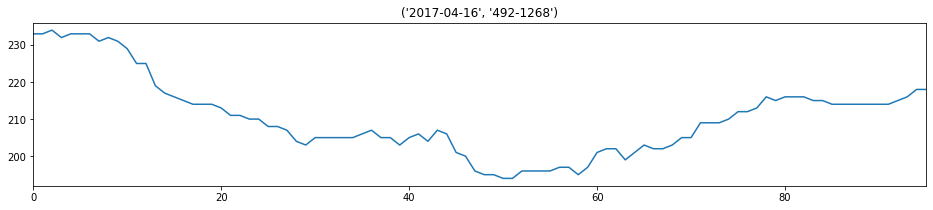

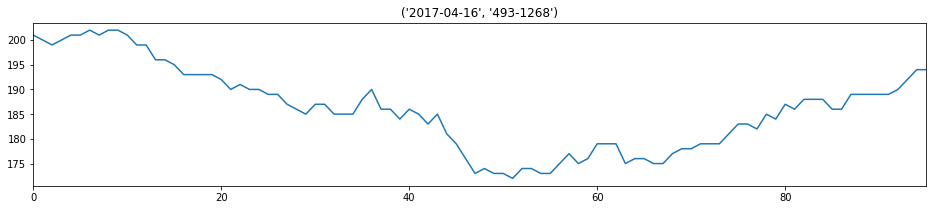

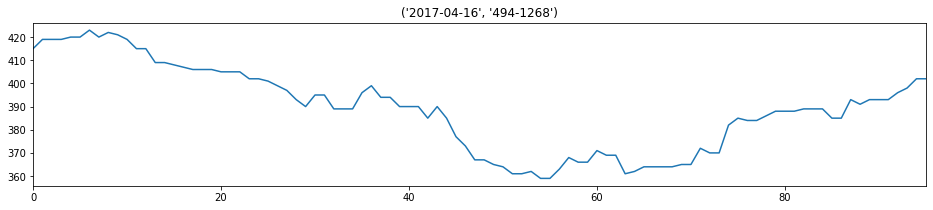

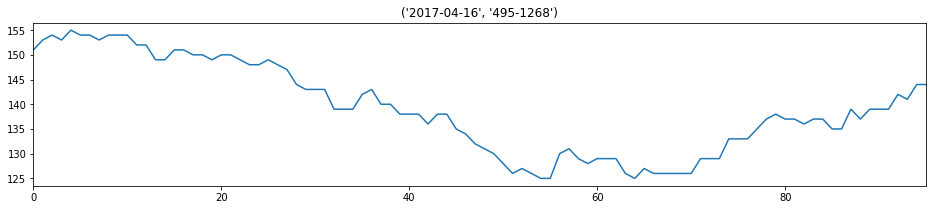

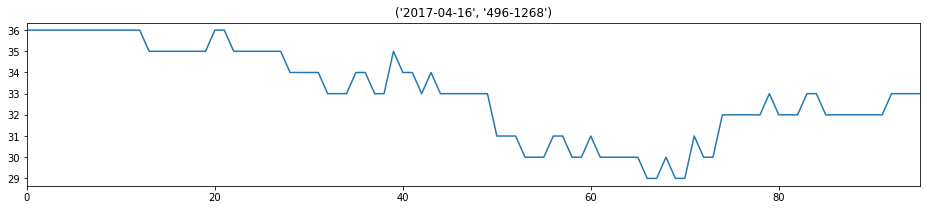

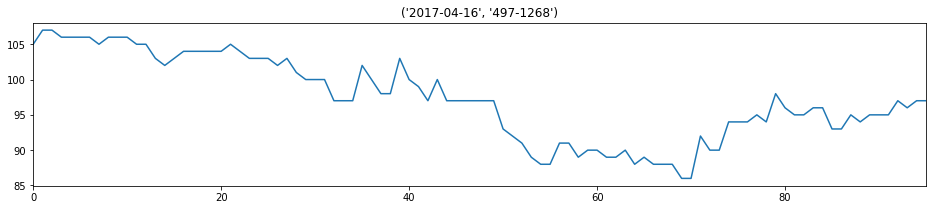

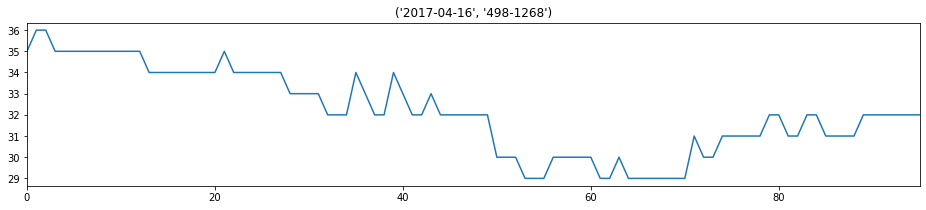

In [21]:
count = 0
count_day = 0
for i, k in agg_by_cell_day:
    count +=1
    count_day +=1
    if count % 17 == 0: 
        plt.figure(figsize = (16, 3))  
        k = k['nr_people'].reset_index(drop= True)
        plt.title(i)
        k.plot() 
        plt.show()
    if count_day > 221: break

### Correlazione di tutte le celle con tutte le celle con riferimento a un giorno 

In [17]:
dict4corrdata = {}
count = 0
countday = 0

for i, k in agg_by_cell_day:
    count +=1
    if count > 1: break
    serieX = k['nr_people'].reset_index(drop=True)  
    
    for j, g in agg_by_cell_day:
        
        if i[1] == j[1]: continue  
       
        serieY = g['nr_people'].reset_index(drop=True)
       
        cc = crosscorr(serieX, serieY, 4)
        
        cells = i[1]+','+j[1]
        print('cells ', cells, 'corr -->', cc)
        dict4corrdata[cells] = cc
        countday+=1
        if countday > 220: break

cells  486-1252,486-1253 corr --> 0.9306664935507035
cells  486-1252,486-1254 corr --> 0.9372067514360144
cells  486-1252,486-1255 corr --> 0.9451660085643598
cells  486-1252,486-1256 corr --> 0.9535259917950517
cells  486-1252,486-1257 corr --> 0.9421913219477094
cells  486-1252,486-1258 corr --> 0.961606097169703
cells  486-1252,486-1259 corr --> 0.9647170594553269
cells  486-1252,486-1260 corr --> 0.9643868699479563
cells  486-1252,486-1261 corr --> 0.9644627712959679
cells  486-1252,486-1262 corr --> 0.9655179844911387
cells  486-1252,486-1263 corr --> 0.965011845699526
cells  486-1252,486-1264 corr --> 0.9640916856654331
cells  486-1252,486-1265 corr --> 0.8697412200818233
cells  486-1252,486-1266 corr --> 0.8477830975248505
cells  486-1252,486-1267 corr --> 0.7679550078064615
cells  486-1252,486-1268 corr --> 0.7825738569314027
cells  486-1252,487-1252 corr --> 0.9293899244575152
cells  486-1252,487-1253 corr --> 0.9389278949664239
cells  486-1252,487-1254 corr --> 0.944610744653

cells  486-1252,497-1254 corr --> -0.7228968511505958
cells  486-1252,497-1255 corr --> -0.10837748914259536
cells  486-1252,497-1256 corr --> -0.20531599837073108
cells  486-1252,497-1257 corr --> -0.22545858683459133
cells  486-1252,497-1258 corr --> 0.11830764344445589
cells  486-1252,497-1259 corr --> 0.7452522335380198
cells  486-1252,497-1260 corr --> 0.3976184524595188
cells  486-1252,497-1261 corr --> 0.2593849293611182
cells  486-1252,497-1262 corr --> -0.25932677816661776
cells  486-1252,497-1263 corr --> -0.7543782423838115
cells  486-1252,497-1264 corr --> -0.01591428865807997
cells  486-1252,497-1265 corr --> -0.7506654986427654
cells  486-1252,497-1266 corr --> -0.757878162892468
cells  486-1252,497-1267 corr --> -0.7235544249488679
cells  486-1252,497-1268 corr --> -0.70253974027281
cells  486-1252,498-1252 corr --> -0.79408195097321
cells  486-1252,498-1253 corr --> -0.7043538591274655
cells  486-1252,498-1254 corr --> -0.4349006419397859
cells  486-1252,498-1255 corr -

### Visualizza dati 

In [18]:
cell_1 = agg_by_cell_day.get_group(('2017-04-16', '486-1252'))['nr_people'].tolist()
cell_2 = agg_by_cell_day.get_group(('2017-04-16', '486-1253'))['nr_people'].tolist()
cell_3 = agg_by_cell_day.get_group(('2017-04-16', '486-1254'))['nr_people'].tolist()


cell_4 = agg_by_cell_day.get_group(('2017-04-16', '490-1261'))['nr_people'].tolist()
cell_5 = agg_by_cell_day.get_group(('2017-04-16', '490-1262'))['nr_people'].tolist()

cell_6 = agg_by_cell_day.get_group(('2017-04-16', '495-1252'))['nr_people'].tolist()
cell_7 = agg_by_cell_day.get_group(('2017-04-16', '495-1253'))['nr_people'].tolist()
cell_8 = agg_by_cell_day.get_group(('2017-04-16', '495-1254'))['nr_people'].tolist()

In [19]:
data4corr = pd.DataFrame(columns = ['486-1252', '486-1253', '486-1254', 
                                    '490-1261', '490-1262', 
                                    '495-1252', '495-1253', '495-1254'])

data4corr['486-1252'] = cell_1
data4corr['486-1253'] = cell_2
data4corr['486-1254'] = cell_3

data4corr['490-1261'] = cell_4
data4corr['490-1262'] = cell_5

data4corr['495-1252'] = cell_6
data4corr['495-1253'] = cell_7
data4corr['495-1254'] = cell_8

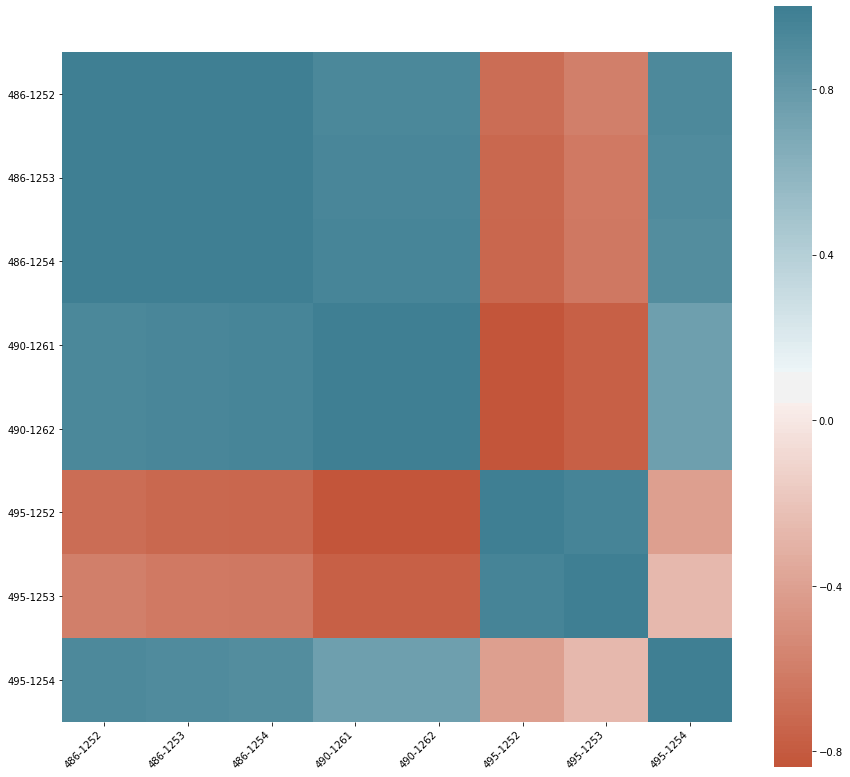

In [20]:
fig, ax = plt.subplots(figsize=(15,14)) 
corr = data4corr.corr()
ax = sns.heatmap(
    corr, 
    #vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);